In [1]:
!pip install pandas
!pip install glob2


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import glob
import os

In [4]:
import pandas as pd

# Create a dictionary with the data from the table
data = {
    'Borehole': ['Atigaru Test Well #1', 'Awuna Test Well #1', 'Canning River Unit A1', 'Drew Point Test Well #1', 
                 'East Simpson Test Well #1', 'East Teshekpuk Test Well #1', 'Echooka Unit #1 (Mobil Oil)', 
                 'Ikpikpuk Test Well #1', 'J.W. Dalton Test Well #1', 'Koluktak Test Well #1', 'Kugrua Test Well #1', 
                 'Kuyanak Test Well #1', 'Lisburne Test Well #1', 'Lupine Unit #1 (Forest Oil)', 'North Inigok Test Well #1', 
                 'North Kalikpik Test Well #1', 'Peard Bay Test Well #1', 'Seabee Test Well #1', 'South Harrison Test Well #1', 
                 'South Meade Test Well #1', 'Tulageak Test Well #1', 'Tunalik Test Well #1', 'West Dease Test Well #1', 
                 'West Fish Creek Test Well #1'],
    
    'USGS Code': ['ATI', 'AWU', 'CNR', 'DRP', 'ESN', 'ETK', 'EB1', 'IKP', 'JWD', 'KOL', 'KAG', 'KUY', 'LBN', 'LUP', 'NIN', 
                  'NKP', 'PEA', 'SBE', 'SOH', 'SME', 'TUL', 'TLK', 'WDS', 'FCK'],
    
    'GTN-P Code': ['US 01', 'US 02', 'US 94', 'US 03', 'US 04', 'US 05', 'US 93', 'US 07', 'US 08', 'US 10', 'US 09', 
                   'US 11', 'US 12', 'US 92', 'US 13', 'US 14', 'US 15', 'US 16', 'US 18', 'US 17', 'US 20', 'US 19', 
                   'US 21', 'US 06'],
    
    'Latitude (north)': ['70°33.348\'', '69°09.193\'', '69°36.353\'', '70°52.762\'', '70°55.046\'', '70°34.171\'', 
                         '69°23.994\'', '70°27.305\'', '70°55.207\'', '69°45.144\'', '70°35.191\'', '70°55.869\'', 
                         '68°29.061\'', '69°06.051\'', '70°15.435\'', '70°30.550\'', '70°42.939\'', '69°22.809\'', 
                         '70°25.468\'', '70°36.872\'', '71°11.338\'', '70°12.358\'', '71°09.524\'', '70°19.600\''],
    
    'Longitude (west)': ['151°43.229\'', '158°01.355\'', '146°20.294\'', '153°54.202\'', '154°37.286\'', '152°56.815\'', 
                         '148°16.313\'', '154°20.082\'', '153°08.454\'', '154°36.669\'', '158°39.923\'', '156°04.092\'', 
                         '155°41.773\'', '148°37.290\'', '152°46.139\'', '152°22.070\'', '159°00.042\'', '152°10.522\'', 
                         '151°44.071\'', '156°53.601\'', '155°44.228\'', '161°04.153\'', '155°37.983\'', '152°03.634\''],
    
    'Depth (m)': [648, 884, 265, 640, 600, 727, 595, 615, 483, 227, 582, 856, 532, 469, 625, 660, 591, 393, 399, 549, 756, 
                  556, 823, 735],
    
    'First Log (yr-mon-day)': ['1977DEC14', '1981AUG22', '1974AUG29', '1978SEP17', '1979SEP13', '1977DEC17', '1973SEP26', 
                               '1980SEP10', '1979SEP13', '1981AUG23', '1978SEP15', '1981AUG25', '1980SEP09', '1975AUG15', 
                               '1982AUG31', '1978SEP16', '1979SEP15', '1980SEP09', '1977DEC16', '1979SEP14', '1981AUG24', 
                               '1980SEP15', '1980SEP14', '1977DEC11'],
    
    'Climate Station': [' ', '♠', ' ', '♠', ' ', '♠', ' ', '♠', ' ', '♠', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '♠', ' ', '♠', 
                        ' ', '♠', ' ', '♠']
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('borehole_data.csv', index=False)

print("CSV file created successfully.")

CSV file created successfully.


In [5]:
import glob
import pandas as pd

# Get a list of all text files in the directory
all_files = glob.glob('/Users/anastringer_1/Desktop/G10015/*.txt')

# Create an empty list to store DataFrames
data_frames = []

# Loop through each file and read it into a DataFrame
for file in all_files:
    try:
        # Skipping the first 10 lines and reading only the relevant columns
        data = pd.read_csv(file, sep='\s+', skiprows=10, header=None, usecols=[0, 1], names=["Depth", "Temperature"], engine='python')
        data_frames.append(data)
        print(f"Successfully read data from {file}")
    except Exception as e:
        # Capture more information about the error
        print(f"Error reading {file}: {e}")

# Check if any data was successfully read before attempting to concatenate
if data_frames:
    # Concatenate all DataFrames into one
    combined_data = pd.concat(data_frames, ignore_index=True)

    # Show the first few rows of the combined data
    print(combined_data.head())
else:
    print("No data was successfully read.")

Successfully read data from /Users/anastringer_1/Desktop/G10015/NIN_82AUG31.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/ESN_07AUG10b.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/LBN_80SEP09.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/ETK_79SEP12.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/JWD_84AUG09.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/SME_84AUG04.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/JWD_79SEP13.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/ESN_80SEP13.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/error_log.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/DRP_07AUG09.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/TLK_84JUL31b.txt
Successfully read data from /Users/anastringer_1/Desktop/G10015/IKP_12AUG05.txt
Successfully read data from /Users/anast

In [6]:
import glob
import os

# Get all text files in the directory
all_files = glob.glob('/Users/anastringer_1/Desktop/G10015/*.txt')

# Dictionary to store lists of files grouped by borehole code
borehole_files = {}

# Function to extract borehole code from the file name (assuming borehole code is the first 3 letters)
def get_borehole_code(file_name):
    base_name = os.path.basename(file_name)
    return base_name.split('_')[0]  # Adjust this if borehole code is located elsewhere in the name

# Loop through each file and group by borehole
for file in all_files:
    borehole_code = get_borehole_code(file)
    
    if borehole_code not in borehole_files:
        borehole_files[borehole_code] = []
    
    borehole_files[borehole_code].append(file)

# Print to verify the grouping
for borehole, files in borehole_files.items():
    print(f"Borehole: {borehole}, Files: {files}")

Borehole: NIN, Files: ['/Users/anastringer_1/Desktop/G10015/NIN_82AUG31.txt', '/Users/anastringer_1/Desktop/G10015/NIN_07AUG08.txt', '/Users/anastringer_1/Desktop/G10015/NIN_12AUG10.txt', '/Users/anastringer_1/Desktop/G10015/NIN_85JUN29.txt', '/Users/anastringer_1/Desktop/G10015/NIN_02AUG26.txt', '/Users/anastringer_1/Desktop/G10015/NIN_89JUL06b.txt', '/Users/anastringer_1/Desktop/G10015/NIN_89JUL06a.txt']
Borehole: ESN, Files: ['/Users/anastringer_1/Desktop/G10015/ESN_07AUG10b.txt', '/Users/anastringer_1/Desktop/G10015/ESN_80SEP13.txt', '/Users/anastringer_1/Desktop/G10015/ESN_79SEP13.txt', '/Users/anastringer_1/Desktop/G10015/ESN_83SEP05.txt', '/Users/anastringer_1/Desktop/G10015/ESN_89JUL23.txt', '/Users/anastringer_1/Desktop/G10015/ESN_02AUG23.txt', '/Users/anastringer_1/Desktop/G10015/ESN_84AUG10.txt', '/Users/anastringer_1/Desktop/G10015/ESN_81AUG24.txt', '/Users/anastringer_1/Desktop/G10015/ESN_12AUG09.txt']
Borehole: LBN, Files: ['/Users/anastringer_1/Desktop/G10015/LBN_80SEP09

In [6]:
import glob
import os

# Get all text files in the directory
all_files = glob.glob('/Users/anastringer_1/Desktop/G10015/*.txt')

# Dictionary to store lists of files grouped by borehole code
borehole_files = {}

# Function to extract borehole code from the file name (first 3 letters)
def get_borehole_code(file_name):
    base_name = os.path.basename(file_name)
    return base_name[:3]  # First 3 letters of the file name are the borehole code

# Loop through each file and group by borehole code
for file in all_files:
    borehole_code = get_borehole_code(file)
    
    if borehole_code not in borehole_files:
        borehole_files[borehole_code] = []
    
    borehole_files[borehole_code].append(file)

# Print to verify the grouping
for borehole, files in borehole_files.items():
    print(f"Borehole: {borehole}, Files: {files}")

Borehole: NIN, Files: ['/Users/anastringer_1/Desktop/G10015/NIN_82AUG31.txt', '/Users/anastringer_1/Desktop/G10015/NIN_07AUG08.txt', '/Users/anastringer_1/Desktop/G10015/NIN_12AUG10.txt', '/Users/anastringer_1/Desktop/G10015/NIN_85JUN29.txt', '/Users/anastringer_1/Desktop/G10015/NIN_02AUG26.txt', '/Users/anastringer_1/Desktop/G10015/NIN_89JUL06b.txt', '/Users/anastringer_1/Desktop/G10015/NIN_89JUL06a.txt']
Borehole: ESN, Files: ['/Users/anastringer_1/Desktop/G10015/ESN_07AUG10b.txt', '/Users/anastringer_1/Desktop/G10015/ESN_80SEP13.txt', '/Users/anastringer_1/Desktop/G10015/ESN_79SEP13.txt', '/Users/anastringer_1/Desktop/G10015/ESN_83SEP05.txt', '/Users/anastringer_1/Desktop/G10015/ESN_89JUL23.txt', '/Users/anastringer_1/Desktop/G10015/ESN_02AUG23.txt', '/Users/anastringer_1/Desktop/G10015/ESN_84AUG10.txt', '/Users/anastringer_1/Desktop/G10015/ESN_81AUG24.txt', '/Users/anastringer_1/Desktop/G10015/ESN_12AUG09.txt']
Borehole: LBN, Files: ['/Users/anastringer_1/Desktop/G10015/LBN_80SEP09

In [10]:
import glob
import pandas as pd
import os

# Get all text files in the directory
all_files = glob.glob('/Users/anastringer_1/Desktop/G10015/*.txt')

# Dictionary to store lists of files grouped by borehole code
borehole_files = {}

# Function to extract borehole code and log date from the file name
def extract_borehole_and_date(file_name):
    base_name = os.path.basename(file_name)
    
    # Extract borehole code (first 3 letters)
    borehole_code = base_name[:3]
    
    # Extract log date (from 4th to 11th character, assuming format XYZ_YYMMMDD)
    log_date_str = base_name[4:11]
    
    # Parse the date into a standard format
    log_date = pd.to_datetime(log_date_str, format='%y%b%d', errors='coerce')
    
    return borehole_code, log_date

# Loop through each file and group by borehole code
for file in all_files:
    borehole_code, log_date = extract_borehole_and_date(file)
    
    if borehole_code not in borehole_files:
        borehole_files[borehole_code] = []
    
    # Store file with its log date for future reference
    borehole_files[borehole_code].append((file, log_date))

# Dictionary to store processed and aggregated data for each borehole
borehole_data = {}

# Loop through each borehole and its corresponding files
for borehole_code, files in borehole_files.items():
    borehole_dfs = []
    
    for file, log_date in files:
        try:
            # Reading the file (skip the first 10 rows if they are headers, adjust accordingly)
            df = pd.read_csv(file, sep='\s+', skiprows=10, header=None, usecols=[0, 1], names=["Depth", "Temperature"], engine='python')

            # Convert columns to numeric, invalid parsing will be set as NaN
            df["Depth"] = pd.to_numeric(df["Depth"], errors='coerce')
            df["Temperature"] = pd.to_numeric(df["Temperature"], errors='coerce')

            # Drop rows with NaN values (which occur when conversion to numeric fails)
            df = df.dropna()

            # Add log date to the dataframe
            df["Log_Date"] = log_date

            borehole_dfs.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    # Concatenate data from all files related to this borehole
    if borehole_dfs:
        combined_df = pd.concat(borehole_dfs, ignore_index=True)
        
        # Group by depth and average temperature for consistent data
        combined_df = combined_df.groupby("Depth", as_index=False).agg({"Temperature": "mean", "Log_Date": "first"})
        
        # Store the combined data for this borehole
        borehole_data[borehole_code] = combined_df
    
        # Optionally, print or inspect the combined data
        print(f"Combined data for borehole {borehole_code}:")
        print(combined_df.head())

# Now, borehole_data contains the combined depth-temperature data and log dates for each borehole

Combined data for borehole NIN:
   Depth  Temperature   Log_Date
0   5.75       -5.355 2007-08-08
1   5.77       -5.357 2007-08-08
2   5.81       -5.360 2007-08-08
3   5.86       -5.363 2007-08-08
4   5.92       -5.368 2007-08-08
Combined data for borehole ESN:
   Depth  Temperature   Log_Date
0   9.14      -8.2405 2007-08-10
1   9.17      -8.3240 2007-08-10
2   9.20      -8.3250 2007-08-10
3   9.24      -8.3250 2007-08-10
4   9.29      -8.3260 2007-08-10
Combined data for borehole LBN:
   Depth  Temperature   Log_Date
0  14.17       -4.682 2002-08-22
1  14.20       -4.684 2002-08-22
2  14.24       -4.687 2002-08-22
3  14.31       -4.689 2002-08-22
4  14.40       -4.691 2002-08-22
Combined data for borehole ETK:
   Depth  Temperature   Log_Date
0   2.94       -4.954 2007-08-04
1   2.97       -4.959 2007-08-04
2   3.01       -4.968 2007-08-04
3   3.05       -4.982 2007-08-04
4   3.09       -5.004 2007-08-04
Combined data for borehole JWD:
   Depth  Temperature   Log_Date
0  27.43      -

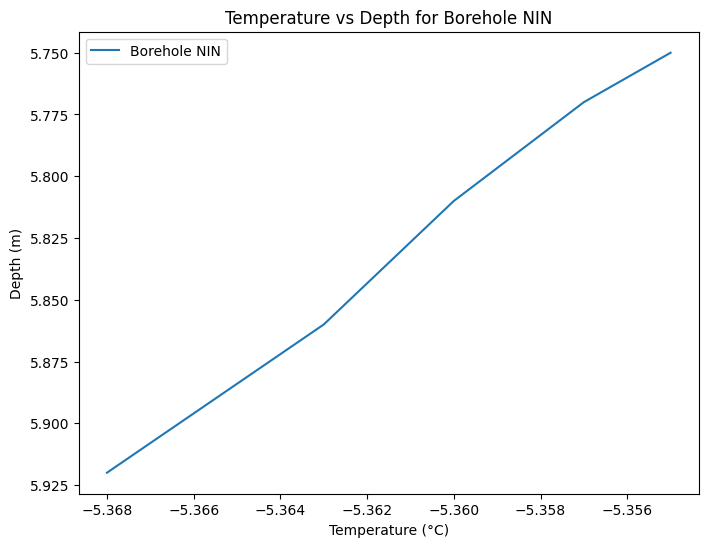

Plot displayed for borehole NIN


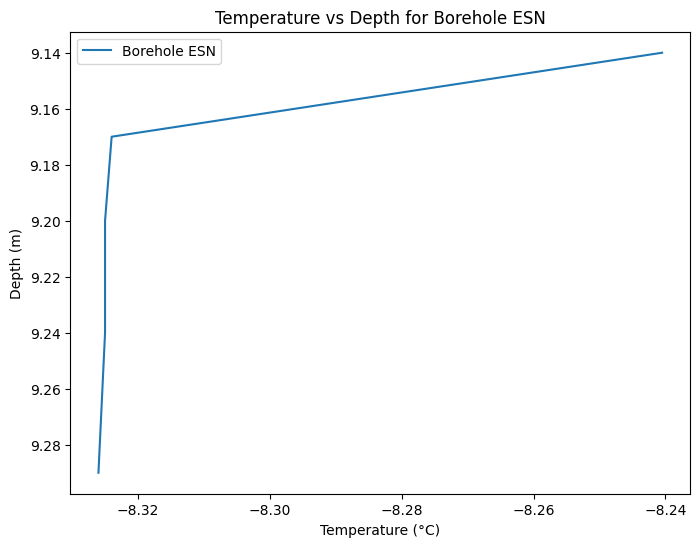

Plot displayed for borehole ESN


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot temperature vs depth for a specific borehole
def plot_temperature_vs_depth(borehole_data, borehole_code):
    plt.figure(figsize=(8, 6))
    plt.plot(borehole_data['Temperature'], borehole_data['Depth'], label=f"Borehole {borehole_code}")
    plt.gca().invert_yaxis()  # Depth increases downwards
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Depth (m)')
    plt.title(f'Temperature vs Depth for Borehole {borehole_code}')
    plt.legend()
    plt.show()

# Function to process all boreholes and generate plots
def process_boreholes_and_plot(borehole_data):
    for borehole_code, data in borehole_data.items():
        try:
            # Ensure data for the borehole is available and not empty
            if not data.empty:
                plot_temperature_vs_depth(data, borehole_code)
                print(f"Plot displayed for borehole {borehole_code}")
            else:
                print(f"No data available for borehole {borehole_code}")
        except Exception as e:
            print(f"Error processing borehole {borehole_code}: {e}")

# Example borehole data structure: Replace this with the actual borehole_data dictionary
borehole_data = {
    'NIN': pd.DataFrame({'Depth': [5.75, 5.77, 5.81, 5.86, 5.92],
                         'Temperature': [-5.355, -5.357, -5.360, -5.363, -5.368],
                         'Log_Date': pd.to_datetime(['2007-08-08']*5)}),
    'ESN': pd.DataFrame({'Depth': [9.14, 9.17, 9.20, 9.24, 9.29],
                         'Temperature': [-8.2405, -8.3240, -8.3250, -8.3250, -8.3260],
                         'Log_Date': pd.to_datetime(['2007-08-10']*5)}),
    # Add all other boreholes' DataFrames here...
    # e.g., 'LBN': pd.DataFrame({...}),
    # e.g., 'ETK': pd.DataFrame({...}),
}

# Call the function to process all boreholes and generate plots
process_boreholes_and_plot(borehole_data)

In [14]:
import pandas as pd
import glob
import re
import os

# Function to extract log date from file content
def extract_log_date(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        # Use regex to find the log date (assuming it's in DD-MMM-YYYY format)
        log_date = re.search(r'Log date:\s+(\d{2}-[A-Z]{3}-\d{4})', content)
        return pd.to_datetime(log_date.group(1), format='%d-%b-%Y') if log_date else None

# Function to read the temperature and depth data from each file
def read_borehole_data(file_path):
    # Read the actual data, skipping non-data lines
    data = pd.read_csv(file_path, sep='\s+', skiprows=10, header=None, usecols=[0, 1], 
                       names=["Depth", "Temperature"], engine='python')
    return data

# Process all borehole files into one file per borehole
def combine_borehole_files(all_files, output_folder):
    borehole_data = {}

    # Loop through each file and group them by borehole
    for file in all_files:
        try:
            # Extract borehole code from file name (assuming borehole code is the first part of the filename)
            borehole_code = os.path.basename(file).split('_')[0]
            
            # Extract log date from file content
            log_date = extract_log_date(file)

            # Read the depth and temperature data
            data = read_borehole_data(file)
            data['Log_Date'] = log_date  # Add the log date to the DataFrame
            
            # Group files by borehole code and append data
            if borehole_code not in borehole_data:
                borehole_data[borehole_code] = []
            borehole_data[borehole_code].append(data)
        
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    
    # Now, concatenate and save the data for each borehole into separate files
    for borehole_code, data_list in borehole_data.items():
        # Concatenate all data for this borehole
        combined_data = pd.concat(data_list, ignore_index=True)
        
        # Sort the data by Log_Date and Depth for chronological order
        combined_data = combined_data.sort_values(by=['Log_Date', 'Depth'])
        
        # Save the combined data to a CSV file in the same folder
        output_file = os.path.join(output_folder, f"{borehole_code}_combined.csv")
        combined_data.to_csv(output_file, index=False)
        print(f"Saved combined data for {borehole_code} to {output_file}")

# Example: Path to all the files in the folder and output folder for combined files
all_files = glob.glob('/Users/anastringer_1/Desktop/G10015/*.txt')
output_folder = '/Users/anastringer_1/Desktop/G10015'  # Existing folder

# Run the function to combine files
combine_borehole_files(all_files, output_folder)

Saved combined data for NIN to /Users/anastringer_1/Desktop/G10015/NIN_combined.csv
Saved combined data for ESN to /Users/anastringer_1/Desktop/G10015/ESN_combined.csv
Saved combined data for LBN to /Users/anastringer_1/Desktop/G10015/LBN_combined.csv
Saved combined data for ETK to /Users/anastringer_1/Desktop/G10015/ETK_combined.csv
Saved combined data for JWD to /Users/anastringer_1/Desktop/G10015/JWD_combined.csv
Saved combined data for SME to /Users/anastringer_1/Desktop/G10015/SME_combined.csv
Saved combined data for DRP to /Users/anastringer_1/Desktop/G10015/DRP_combined.csv
Saved combined data for TLK to /Users/anastringer_1/Desktop/G10015/TLK_combined.csv
Saved combined data for IKP to /Users/anastringer_1/Desktop/G10015/IKP_combined.csv
Saved combined data for KOL to /Users/anastringer_1/Desktop/G10015/KOL_combined.csv
Saved combined data for KAG to /Users/anastringer_1/Desktop/G10015/KAG_combined.csv
Saved combined data for WDS to /Users/anastringer_1/Desktop/G10015/WDS_combi

In [21]:
import pandas as pd
import os

# Function to extract date from the filename (e.g., 'ATI_89JUL28.txt')
def extract_date_from_filename(filename):
    date_str = filename.split('_')[1][:7]  # e.g., '89JUL28'
    try:
        date_format = pd.to_datetime(date_str, format='%y%b%d')
    except ValueError:
        date_format = pd.NaT  # Handle invalid date formats gracefully
    return date_format

# Directory containing borehole files
directory = '/Users/anastringer_1/Desktop/G10015/'  # Replace with your actual path

# Borehole codes (update this list with all borehole codes)
borehole_codes = ['NIN', 'ESN', 'LBN', 'ETK', 'JWD', 'SME', 'DRP', 'TLK', 'IKP', 'KOL',
                  'KAG', 'WDS', 'NKP', 'CNR', 'SBE', 'KUY', 'TUL', 'SOH', 'AWU', 'EB1',
                  'PEA', 'FCK', 'ATI', 'LUP']

# Loop through all borehole codes and process the files for each
for borehole_code in borehole_codes:
    # Initialize an empty DataFrame to hold all the combined data for the borehole
    combined_data = pd.DataFrame()

    # Loop through files in the directory that match the borehole code
    for filename in os.listdir(directory):
        if filename.startswith(borehole_code):
            file_path = os.path.join(directory, filename)

            try:
                # Skip the first 10 rows (metadata) and read in the data, using sep='\s+'
                data = pd.read_csv(file_path, skiprows=10, sep='\s+', header=None, 
                                   names=['Depth', 'Temperature'], on_bad_lines='skip')

                # Extract the date from the filename and add it as a new column
                log_date = extract_date_from_filename(filename)
                data['Log_Date'] = log_date

                # Append this data to the combined DataFrame
                combined_data = pd.concat([combined_data, data], ignore_index=True)

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    # Save the combined data for the borehole to a new CSV file
    output_file = os.path.join(directory, f"{borehole_code}_combined_cleaned.csv")
    combined_data.to_csv(output_file, index=False)
    print(f"Combined data for borehole {borehole_code} saved to {output_file}")

Combined data for borehole NIN saved to /Users/anastringer_1/Desktop/G10015/NIN_combined_cleaned.csv
Combined data for borehole ESN saved to /Users/anastringer_1/Desktop/G10015/ESN_combined_cleaned.csv
Combined data for borehole LBN saved to /Users/anastringer_1/Desktop/G10015/LBN_combined_cleaned.csv
Combined data for borehole ETK saved to /Users/anastringer_1/Desktop/G10015/ETK_combined_cleaned.csv
Combined data for borehole JWD saved to /Users/anastringer_1/Desktop/G10015/JWD_combined_cleaned.csv
Combined data for borehole SME saved to /Users/anastringer_1/Desktop/G10015/SME_combined_cleaned.csv
Combined data for borehole DRP saved to /Users/anastringer_1/Desktop/G10015/DRP_combined_cleaned.csv
Combined data for borehole TLK saved to /Users/anastringer_1/Desktop/G10015/TLK_combined_cleaned.csv
Combined data for borehole IKP saved to /Users/anastringer_1/Desktop/G10015/IKP_combined_cleaned.csv
Combined data for borehole KOL saved to /Users/anastringer_1/Desktop/G10015/KOL_combined_cl

In [31]:
import pandas as pd
import os

# Define the directory containing your files
directory = '/Users/anastringer_1/Desktop/G10015'

# Initialize an empty list to store all data
all_data = []

# Log any issues for manual inspection later
error_log = []

# Iterate through each file in the directory
for file_name in os.listdir(directory):
    if file_name.endswith('.txt'):
        file_path = os.path.join(directory, file_name)
        
        try:
            # Extract the borehole ID from the filename (e.g., AWU from AWU_81AUG22.txt)
            borehole_id = file_name.split('_')[0]
            
            # Read the .txt file, replacing deprecated delim_whitespace with sep='\s+'
            data = pd.read_csv(file_path, sep='\s+', header=None, on_bad_lines='skip', engine='python')
            
            # Ensure the data has at least 3 columns
            if data.shape[1] >= 3:
                # Truncate to the first three columns if more exist
                data = data.iloc[:, :3]
                
                # Add borehole and time columns
                data['Borehole'] = borehole_id
                data['Time'] = file_name.split('_')[1]  # Use date/time info from filename
                
                # Append the processed data to the list
                all_data.append(data)
            else:
                error_log.append(f"File {file_name} has less than 3 columns.")

        except Exception as e:
            error_log.append(f"Error processing {file_name}: {e}")

# Combine all the valid data into a single DataFrame
if all_data:
    combined_data = pd.concat(all_data, ignore_index=True)

    # Save the combined data to a CSV file
    output_path = os.path.join(directory, 'combined_cleaned.csv')
    combined_data.to_csv(output_path, index=False)
    
    print(f"Combined data saved to {output_path}.")
else:
    print("No valid data to combine.")

# Log the errors to a file
error_log_path = os.path.join(directory, 'error_log.txt')
with open(error_log_path, 'w') as log_file:
    for log in error_log:
        log_file.write(log + '\n')

print(f"Errors logged in {error_log_path}.")

Combined data saved to /Users/anastringer_1/Desktop/G10015/combined_cleaned.csv.
Errors logged in /Users/anastringer_1/Desktop/G10015/error_log.txt.


In [32]:
import os

# Define the folder path
folder_path = '/Users/anastringer_1/Desktop/G10015'

# List all files in the folder
files = os.listdir(folder_path)

# Print each file in the folder
for file in files:
    print(file)

NIN_82AUG31.txt
ESN_07AUG10b.txt
LBN_80SEP09.txt
ETK_79SEP12.txt
JWD_84AUG09.txt
SME_84AUG04.txt
JWD_79SEP13.txt
ESN_80SEP13.txt
error_log.txt
DRP_07AUG09.txt
TLK_84JUL31b.txt
IKP_12AUG05.txt
KOL_89JUL29.txt
LBN_81AUG22.txt
TLK_80SEP15.txt
TLK_81AUG29.txt
DRP_84AUG10a.txt
KAG_78SEP15.txt
SME_81AUG25.txt
KAG_79SEP15.txt
NIN_07AUG08.txt
WDS_89JUL28.txt
NKP_79SEP10.txt
CNR_14JUN27.txt
SBE_02AUG13.txt
KUY_84AUG02.txt
IKP_80SEP10.txt
ETK_80SEP10.txt
KOL_02AUG12.txt
TUL_81AUG24.txt
.DS_Store
SOH_07AUG12.txt
NKP_12AUG10.txt
TLK_12AUG11.txt
AWU_83AUG30.txt
SME_12AUG09.txt
NKP_80SEP11.txt
KAG_81AUG29.txt
DRP_89JUL13.txt
IKP_84AUG05b.txt
KUY_81AUG25.txt
ETK_78SEP17.txt
NKP_03AUG19b.txt
AWU_08JUL24.txt
EB1_75AUG15.txt
ESN_79SEP13.txt
PEA_84AUG06.txt
NKP_78SEP16.txt
KAG_80SEP16.txt
IKP_84AUG05a.txt
FCK_89JUL09.txt
SOH_02AUG27b.txt
ATI_81AUG26.txt
CNR_74AUG29.txt
NKP_07AUG08.txt
ATI_84AUG08a.txt
SME_07AUG10.txt
AWU_12AUG07.txt
LBN_02AUG22b.txt
JWD_83AUG26.txt
AWU_84JUL29.txt
ETK_89JUL15.txt
WDS_80S

In [33]:
import os
import pandas as pd

# Define the folder path and NIN files
folder_path = '/Users/anastringer_1/Desktop/G10015'
nin_files = [
    'NIN_82AUG31.txt',
    'NIN_85JUN29.txt',
    'NIN_02AUG26.txt',
    'NIN_07AUG08.txt',
    'NIN_12AUG10.txt',
    'NIN_89JUL06a.txt',
    'NIN_89JUL06b.txt'
]

# Function to extract the date from the filename and format it as YYYY-MM-DD
def extract_date(file_name):
    year = file_name[4:6]
    month = file_name[6:9]
    day = file_name[9:11]
    
    # Convert the month abbreviation to a number
    months = {'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}
    month_num = months[month.upper()]
    
    # Format the date as YYYY-MM-DD
    full_date = f"19{year}-{month_num}-{day}" if int(year) > 50 else f"20{year}-{month_num}-{day}"  # Handle 20th century and 21st century dates
    return full_date

# Initialize an empty list to store the data
combined_data = []

# Process each NIN file
for file_name in nin_files:
    file_path = os.path.join(folder_path, file_name)
    
    # Extract the date from the filename
    date = extract_date(file_name)
    
    # Read the file, skipping the header and the irrelevant sections (assume data starts after "Depth  Temperature" line)
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Find where the actual data starts, which is after the "Depth  Temperature" line
        data_start = None
        for i, line in enumerate(lines):
            if "Depth  Temperature" in line:
                data_start = i + 1  # The data starts right after this line
                break
        
        # Read the data into a DataFrame, skipping the header
        if data_start is not None:
            df = pd.read_csv(file_path, delimiter='\s+', skiprows=data_start, header=None, names=['Depth', 'Temperature'])
            
            # Add the 'date' column
            df['Date'] = date
            
            # Append the data to the list
            combined_data.append(df)
        else:
            print(f"No data found in {file_name}")

# Concatenate all the DataFrames in the list
combined_df = pd.concat(combined_data, ignore_index=True)

# Sort the combined DataFrame by the 'Date' column to ensure it's in chronological order
combined_df['Date'] = pd.to_datetime(combined_df['Date'])  # Ensure 'Date' is treated as datetime
combined_df = combined_df.sort_values(by='Date')

# Save the combined DataFrame to a new CSV file
output_file = os.path.join(folder_path, 'NIN_combined.csv')
combined_df.to_csv(output_file, index=False)

print("NIN files combined successfully into NIN_combined.csv!")

NIN files combined successfully into NIN_combined.csv!


In [36]:
import os
import pandas as pd

# Define the folder path where the .txt files are located
folder_path = '/Users/anastringer_1/Desktop/G10015'

# Define the output folder where combined files will be saved
output_folder = '/Users/anastringer_1/permafrost project/combined_files'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define a dictionary of location groups and their associated files in chronological order
location_files = {
    'ESN': [
        'ESN_79SEP13.txt',
        'ESN_80SEP13.txt',
        'ESN_81AUG24.txt',
        'ESN_83SEP05.txt',
        'ESN_84AUG10.txt',
        'ESN_89JUL23.txt',
        'ESN_02AUG23.txt',
        'ESN_07AUG10b.txt',
        'ESN_12AUG09.txt'
    ],
    'LBN': [
        'LBN_80SEP09.txt',
        'LBN_81AUG22.txt',
        'LBN_83SEP01.txt',
        'LBN_84JUL28.txt',
        'LBN_89JUL21.txt',
        'LBN_02AUG22a.txt',
        'LBN_02AUG22b.txt'
    ],
    'ETK': [
        'ETK_77DEC17.txt',
        'ETK_78SEP17.txt',
        'ETK_79SEP12.txt',
        'ETK_80SEP10.txt',
        'ETK_84AUG01.txt',
        'ETK_89JUL15.txt',
        'ETK_07AUG04.txt',
        'ETK_03AUG18b.txt'
    ],
    'JWD': [
        'JWD_79SEP13.txt',
        'JWD_80SEP08.txt',
        'JWD_81AUG26.txt',
        'JWD_83AUG26.txt',
        'JWD_84AUG09.txt',
        'JWD_89JUL11.txt',
        'JWD_03AUG26.txt'
    ],
    'SME': [
        'SME_79SEP14.txt',
        'SME_80SEP14.txt',
        'SME_81AUG25.txt',
        'SME_83AUG21.txt',
        'SME_84AUG04.txt',
        'SME_07AUG10.txt',
        'SME_12AUG09.txt',
        'SME_02AUG20.txt'
    ],
    'DRP': [
        'DRP_78SEP17.txt',
        'DRP_79SEP13.txt',
        'DRP_80SEP08.txt',
        'DRP_81AUG26.txt',
        'DRP_83SEP05.txt',
        'DRP_84AUG10a.txt',
        'DRP_89JUL13.txt',
        'DRP_07AUG09.txt',
        'DRP_03AUG25.txt'
    ],
    'TLK': [
    'TLK_80SEP15.txt',
    'TLK_81AUG29.txt',
    'TLK_83AUG24.txt',
    'TLK_84JUL31b.txt',
    'TLK_89JUL18.txt',
    'TLK_07JUL24.txt',
    'TLK_12AUG11.txt',
    'TLK_03AUG20b.txt'
],
    'IKP': [
        'IKP_80SEP10.txt',
        'IKP_81AUG23.txt',
        'IKP_83AUG20.txt',
        'IKP_84AUG05a.txt',
        'IKP_84AUG05b.txt',
        'IKP_89JUL06.txt',
        'IKP_02AUG21a.txt',
        'IKP_07AUG03a.txt',
        'IKP_12AUG05.txt'
    ],
    'KOL': [
        'KOL_81AUG23.txt',
        'KOL_83SEP07.txt',
        'KOL_84JUL30.txt',
        'KOL_89JUL29.txt',
        'KOL_02AUG12.txt',
        'KOL_07JUL22.txt',
        'KOL_12AUG03.txt'
    ],
    'KAG': [
        'KAG_78SEP15.txt',
        'KAG_79SEP15.txt',
        'KAG_80SEP16.txt',
        'KAG_81AUG29.txt',
        'KAG_83AUG25.txt',
        'KAG_84AUG06.txt',
        'KAG_89JUL26.txt',
        'KAG_02AUG24.txt',
        'KAG_08JUL25.txt',
        'KAG_12AUG08.txt'
    ],
    'WDS': [
        'WDS_80SEP14.txt',
        'WDS_81AUG23.txt',
        'WDS_83AUG28.txt',
        'WDS_89JUL28.txt',
        'WDS_14JUL04.txt'
    ],
    'NKP': [
        'NKP_78SEP16.txt',
        'NKP_79SEP10.txt',
        'NKP_80SEP11.txt',
        'NKP_81AUG20.txt',
        'NKP_84AUG01a.txt',
        'NKP_84AUG01b.txt',
        'NKP_03AUG19b.txt',
        'NKP_07AUG08.txt',
        'NKP_12AUG10.txt'
    ],
    'CNR': [
        'CNR_74AUG29.txt',
        'CNR_79SEP17.txt',
        'CNR_81AUG28.txt',
        'CNR_14JUN27.txt'
    ],
    'SBE': [
        'SBE_80SEP09.txt',
        'SBE_81AUG20.txt',
        'SBE_83SEP01.txt',
        'SBE_84AUG11.txt',
        'SBE_02AUG13.txt',
        'SBE_07JUL21.txt',
        'SBE_12AUG06.txt',
        'SBE_89JUL19.txt'
    ],
    'KUY': [
        'KUY_81AUG25.txt',
        'KUY_83AUG21.txt',
        'KUY_84AUG02.txt',
        'KUY_02AUG25.txt',
        'KUY_07AUG11.txt',
        'KUY_12AUG05.txt'
    ],
    'TUL': [
        'TUL_81AUG24.txt',
        'TUL_83AUG25.txt',
        'TUL_84AUG03a.txt',
        'TUL_84AUG03b.txt',
        'TUL_89JUL27.txt',
        'TUL_03AUG23.txt',
        'TUL_07AUG11.txt',
        'TUL_14JUL02.txt'
    ],
    'SOH': [
        'SOH_77DEC16.txt',
        'SOH_78SEP15.txt',
        'SOH_79SEP12.txt',
        'SOH_80SEP12.txt',
        'SOH_81AUG21.txt',
        'SOH_84AUG08.txt',
        'SOH_89JUL07.txt',
        'SOH_02AUG27b.txt',
        'SOH_07AUG12.txt',
        'SOH_12AUG04.txt'
    ],
    'AWU': [
        'AWU_81AUG22.txt',
        'AWU_82SEP06.txt',
        'AWU_83AUG30.txt',
        'AWU_84JUL29.txt',
        'AWU_89JUL31.txt',
        'AWU_08JUL24.txt',
        'AWU_02AUG14b.txt',
        'AWU_12AUG07.txt'
    ],
    'EB1': [
        'EB1_73SEP26.txt',
        'EB1_75AUG15.txt',
        'EB1_81AUG28.txt',
        'EB1_13JUL28.txt'
    ],
    'PEA': [
        'PEA_79SEP15.txt',
        'PEA_80SEP16.txt',
        'PEA_81AUG29.txt',
        'PEA_83AUG29.txt',
        'PEA_84AUG06.txt',
        'PEA_89JUL26.txt',
        'PEA_03AUG21b.txt',
        'PEA_07JUL23.txt',
        'PEA_12AUG14.txt'
    ],
    'FCK': [
        'FCK_77DEC11.txt',
        'FCK_78SEP16.txt',
        'FCK_79SEP12.txt',
        'FCK_80SEP12.txt',
        'FCK_81AUG21.txt',
        'FCK_84AUG07.txt',
        'FCK_89JUL09.txt',
        'FCK_08JUL19.txt',
        'FCK_12AUG04.txt'
    ],
    'ATI': [
        'ATI_77DEC14.txt',
        'ATI_78SEP16.txt',
        'ATI_79SEP12.txt',
        'ATI_80SEP11.txt',
        'ATI_81AUG26.txt',
        'ATI_84AUG08a.txt',
        'ATI_84AUG08b.txt',
        'ATI_89JUL09a.txt',
        'ATI_89JUL09b.txt',
        'ATI_02AUG16a.txt',
        'ATI_07AUG13.txt'
    ],
    'LUP': [
        'LUP_75AUG15.txt',
        'LUP_79SEP17.txt',
        'LUP_81AUG28.txt',
        'LUP_13JUL26.txt'
    ]
}

# Function to extract the date from the filename and format it as YYYY-MM-DD
def extract_date(file_name):
    year = file_name[4:6]
    month = file_name[6:9]
    day = file_name[9:11]
    
    # Convert the month abbreviation to a number
    months = {'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}
    month_num = months[month.upper()]
    
    # Format the date as YYYY-MM-DD
    full_date = f"19{year}-{month_num}-{day}" if int(year) > 50 else f"20{year}-{month_num}-{day}"  # Handle 20th century and 21st century dates
    return full_date

# Function to process files for a specific location
def process_location(location, files):
    combined_data = []
    
    # Process each file for the location
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        # Extract the date from the filename
        date = extract_date(file_name)
        
        # Read the file, skipping the header and the irrelevant sections (data starts after "Depth  Temperature" line)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            
            # Find where the actual data starts, which is after the "Depth  Temperature" line
            data_start = None
            for i, line in enumerate(lines):
                if "Depth  Temperature" in line:
                    data_start = i + 1  # The data starts right after this line
                    break
            
            # Read the data into a DataFrame, skipping the header
            if data_start is not None:
                df = pd.read_csv(file_path, delimiter='\s+', skiprows=data_start, header=None, names=['Depth', 'Temperature'])
                
                # Add the 'date' column
                df['Date'] = date
                
                # Append the data to the list
                combined_data.append(df)
            else:
                print(f"No data found in {file_name}")
    
    # Concatenate all the DataFrames in the list
    if combined_data:
        combined_df = pd.concat(combined_data, ignore_index=True)
        
        # Sort the combined DataFrame by the 'Date' column
        combined_df['Date'] = pd.to_datetime(combined_df['Date'])
        combined_df = combined_df.sort_values(by='Date')
        
        # Save the combined DataFrame to a new CSV file for this location
        output_file = os.path.join(output_folder, f'{location}_combined.csv')
        combined_df.to_csv(output_file, index=False)
        
        print(f"Files for {location} combined successfully into {output_file}!")

# Process files for each location and save to output folder
for location, files in location_files.items():
    process_location(location, files)

Files for ESN combined successfully into /Users/anastringer_1/permafrost project/combined_files/ESN_combined.csv!
Files for LBN combined successfully into /Users/anastringer_1/permafrost project/combined_files/LBN_combined.csv!
Files for ETK combined successfully into /Users/anastringer_1/permafrost project/combined_files/ETK_combined.csv!
Files for JWD combined successfully into /Users/anastringer_1/permafrost project/combined_files/JWD_combined.csv!
Files for SME combined successfully into /Users/anastringer_1/permafrost project/combined_files/SME_combined.csv!
Files for DRP combined successfully into /Users/anastringer_1/permafrost project/combined_files/DRP_combined.csv!
Files for TLK combined successfully into /Users/anastringer_1/permafrost project/combined_files/TLK_combined.csv!
Files for IKP combined successfully into /Users/anastringer_1/permafrost project/combined_files/IKP_combined.csv!
Files for KOL combined successfully into /Users/anastringer_1/permafrost project/combine

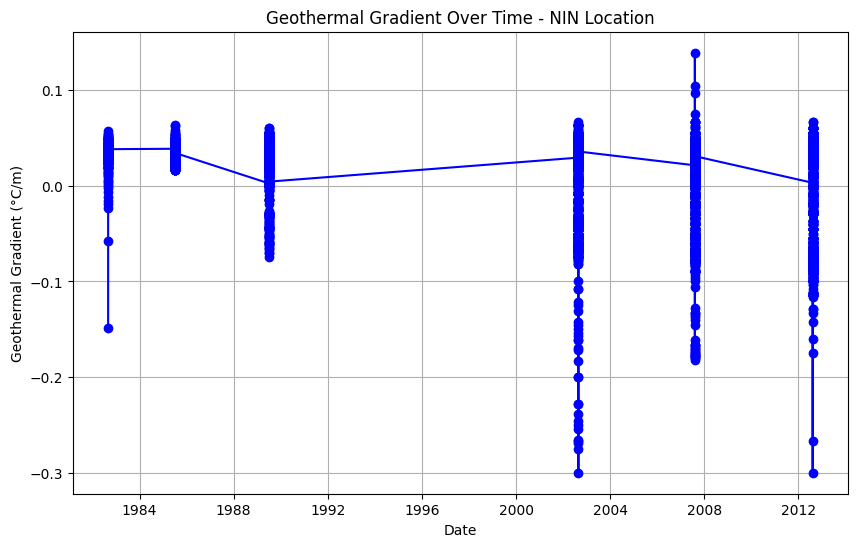

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined NIN data file
nin_file = '/Users/anastringer_1/permafrost project/combined_files/NIN_combined.csv'
nin_data = pd.read_csv(nin_file)

# Ensure the 'Date' column is treated as datetime
nin_data['Date'] = pd.to_datetime(nin_data['Date'])

# Sort the data by date to ensure proper time series
nin_data = nin_data.sort_values(by='Date')

# Calculate the geothermal gradient: Change in Temperature over Change in Depth
nin_data['Geothermal_Gradient'] = nin_data['Temperature'].diff() / nin_data['Depth'].diff()

# Plot geothermal gradient over time
plt.figure(figsize=(10, 6))
plt.plot(nin_data['Date'], nin_data['Geothermal_Gradient'], marker='o', linestyle='-', color='b')
plt.title('Geothermal Gradient Over Time - NIN Location')
plt.xlabel('Date')
plt.ylabel('Geothermal Gradient (°C/m)')
plt.grid(True)
plt.show()

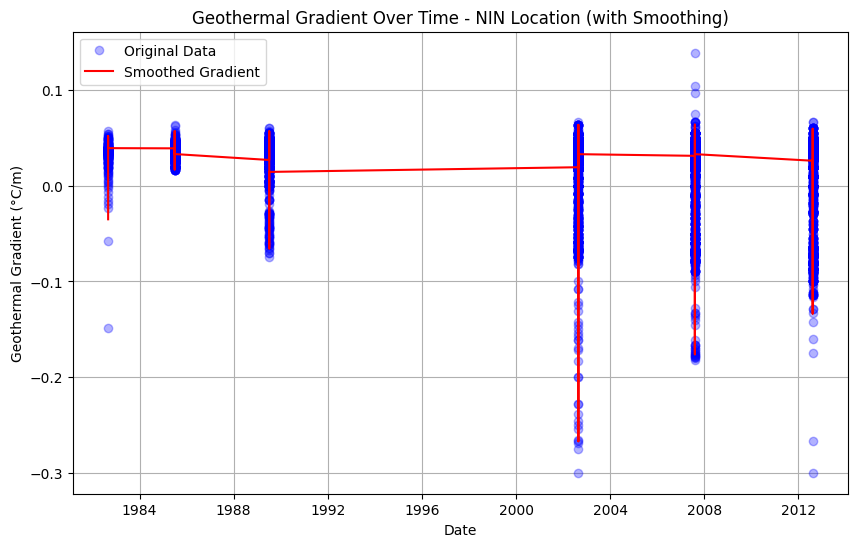

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined NIN data file
nin_file = '/Users/anastringer_1/permafrost project/combined_files/NIN_combined.csv'
nin_data = pd.read_csv(nin_file)

# Ensure the 'Date' column is treated as datetime
nin_data['Date'] = pd.to_datetime(nin_data['Date'])

# Sort the data by date to ensure proper time series
nin_data = nin_data.sort_values(by='Date')

# Calculate the geothermal gradient: Change in Temperature over Change in Depth
nin_data['Geothermal_Gradient'] = nin_data['Temperature'].diff() / nin_data['Depth'].diff()

# Apply a rolling mean to smooth the data (window size 5, for example)
nin_data['Smoothed_Gradient'] = nin_data['Geothermal_Gradient'].rolling(window=5).mean()

# Plot geothermal gradient over time with rolling mean
plt.figure(figsize=(10, 6))
plt.plot(nin_data['Date'], nin_data['Geothermal_Gradient'], marker='o', linestyle='', color='blue', alpha=0.3, label='Original Data')
plt.plot(nin_data['Date'], nin_data['Smoothed_Gradient'], color='red', label='Smoothed Gradient')

plt.title('Geothermal Gradient Over Time - NIN Location (with Smoothing)')
plt.xlabel('Date')
plt.ylabel('Geothermal Gradient (°C/m)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the combined NIN data file
nin_file = '/Users/anastringer_1/permafrost project/combined_files/NIN_combined.csv'
nin_data = pd.read_csv(nin_file)

# Ensure the 'Date' column is treated as datetime
nin_data['Date'] = pd.to_datetime(nin_data['Date'])

# Sort the data by date and depth
nin_data = nin_data.sort_values(by=['Date', 'Depth'])

# Calculate the geothermal gradient: Change in Temperature over Change in Depth
nin_data['Geothermal_Gradient'] = nin_data['Temperature'].diff() / nin_data['Depth'].diff()

# Pivot the data to create a grid (rows are depths, columns are dates, values are geothermal gradient)
heatmap_data = nin_data.pivot(index='Depth', columns='Date', values='Geothermal_Gradient')

# Create the heatmap using pcolormesh (without seaborn)
plt.figure(figsize=(12, 8))

# Convert date to numeric format
heatmap_data.columns = pd.to_numeric(heatmap_data.columns.map(pd.Timestamp.toordinal))

# Plot the data using pcolormesh
plt.pcolormesh(heatmap_data.columns, heatmap_data.index, heatmap_data.values, cmap='coolwarm')

# Add color bar
plt.colorbar(label='Geothermal Gradient (°C/m)')

# Set labels and title
plt.title('Geothermal Gradient Over Time and Depth - NIN Location', fontsize=14)
plt.xlabel('Date (ordinal)', fontsize=12)  # You can format this to show real dates if needed
plt.ylabel('Depth (m)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [43]:
# Check for duplicates in Date and Depth columns
duplicates = nin_data[nin_data.duplicated(subset=['Date', 'Depth'], keep=False)]

# Display duplicates if any
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

Duplicates found:
       Depth  Temperature       Date  Geothermal_Gradient
4709  381.61        3.688 1989-07-06              0.04500
4768  381.61        3.715 1989-07-06                  inf
4708  381.81        3.697 1989-07-06             -0.09000
4767  381.81        3.721 1989-07-06                  inf
4707  382.02        3.705 1989-07-06             -0.07619
...      ...          ...        ...                  ...
4772  396.04        4.223 1989-07-06                 -inf
4741  396.24        4.245 1989-07-06              0.11000
4770  396.24        4.230 1989-07-06                 -inf
4629  396.44        4.252 1989-07-06              0.11000
4769  396.44        4.238 1989-07-06                 -inf

[142 rows x 4 columns]


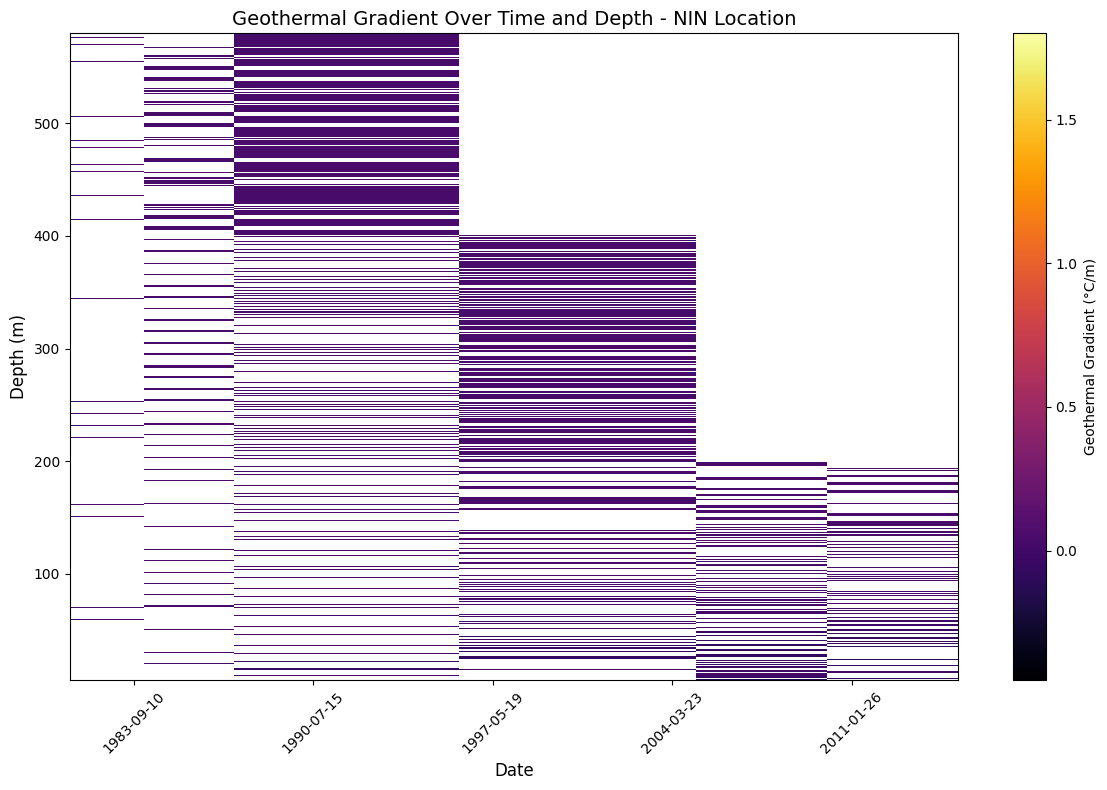

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined NIN data file
nin_file = '/Users/anastringer_1/permafrost project/combined_files/NIN_combined.csv'
nin_data = pd.read_csv(nin_file)

# Ensure the 'Date' column is treated as datetime
nin_data['Date'] = pd.to_datetime(nin_data['Date'])

# Sort the data by date and depth
nin_data = nin_data.sort_values(by=['Date', 'Depth'])

# Calculate the geothermal gradient: Change in Temperature over Change in Depth
nin_data['Geothermal_Gradient'] = nin_data['Temperature'].diff() / nin_data['Depth'].diff()

# Replace inf and -inf values with NaN
nin_data['Geothermal_Gradient'] = nin_data['Geothermal_Gradient'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN (which were previously inf values) in the Geothermal_Gradient
nin_data = nin_data.dropna(subset=['Geothermal_Gradient'])

# Pivot the data to create a grid (rows are depths, columns are dates, values are geothermal gradient)
heatmap_data = nin_data.pivot(index='Depth', columns='Date', values='Geothermal_Gradient')

# Plot the heatmap using pcolormesh
plt.figure(figsize=(12, 8))

# Customize colormap for better visibility
plt.pcolormesh(heatmap_data.columns, heatmap_data.index, heatmap_data.values, cmap='inferno')

# Add color bar
plt.colorbar(label='Geothermal Gradient (°C/m)')

# Set labels and title
plt.title('Geothermal Gradient Over Time and Depth - NIN Location', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust date ticks for better spacing (optional)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))

plt.tight_layout()
plt.show()

In [49]:
!pip install seaborn 

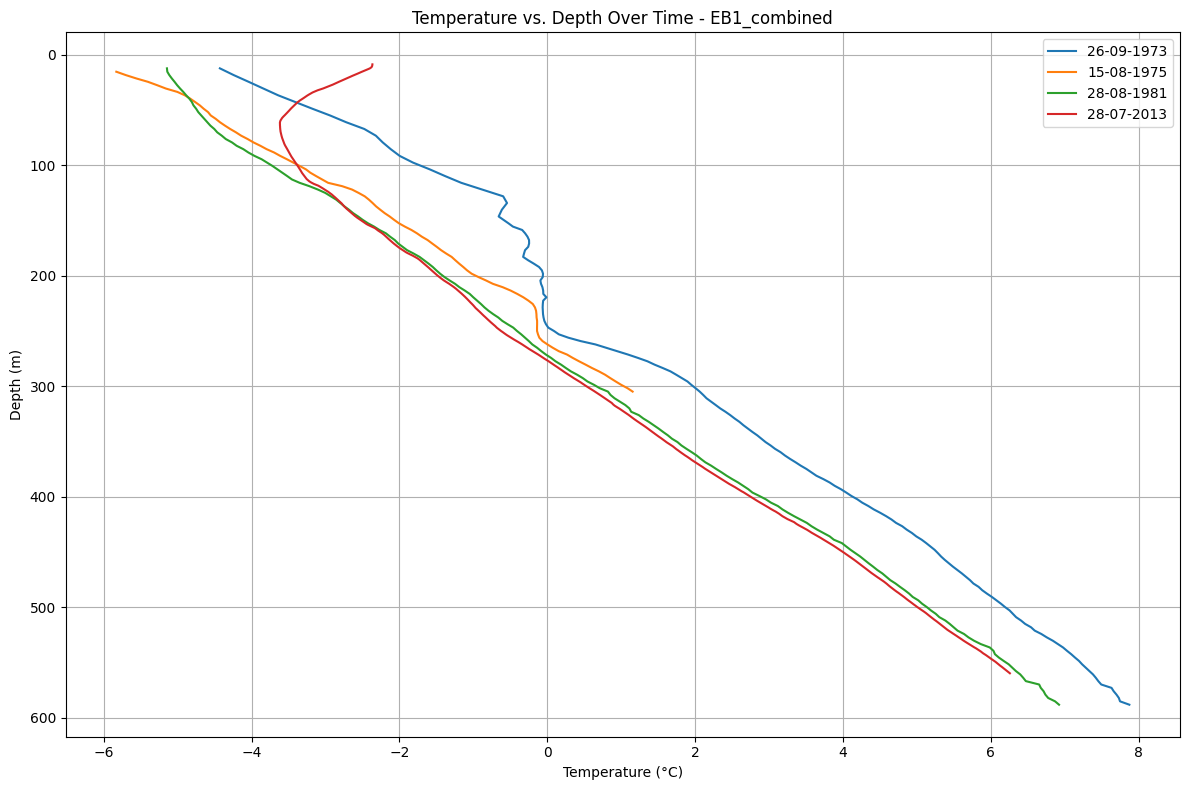

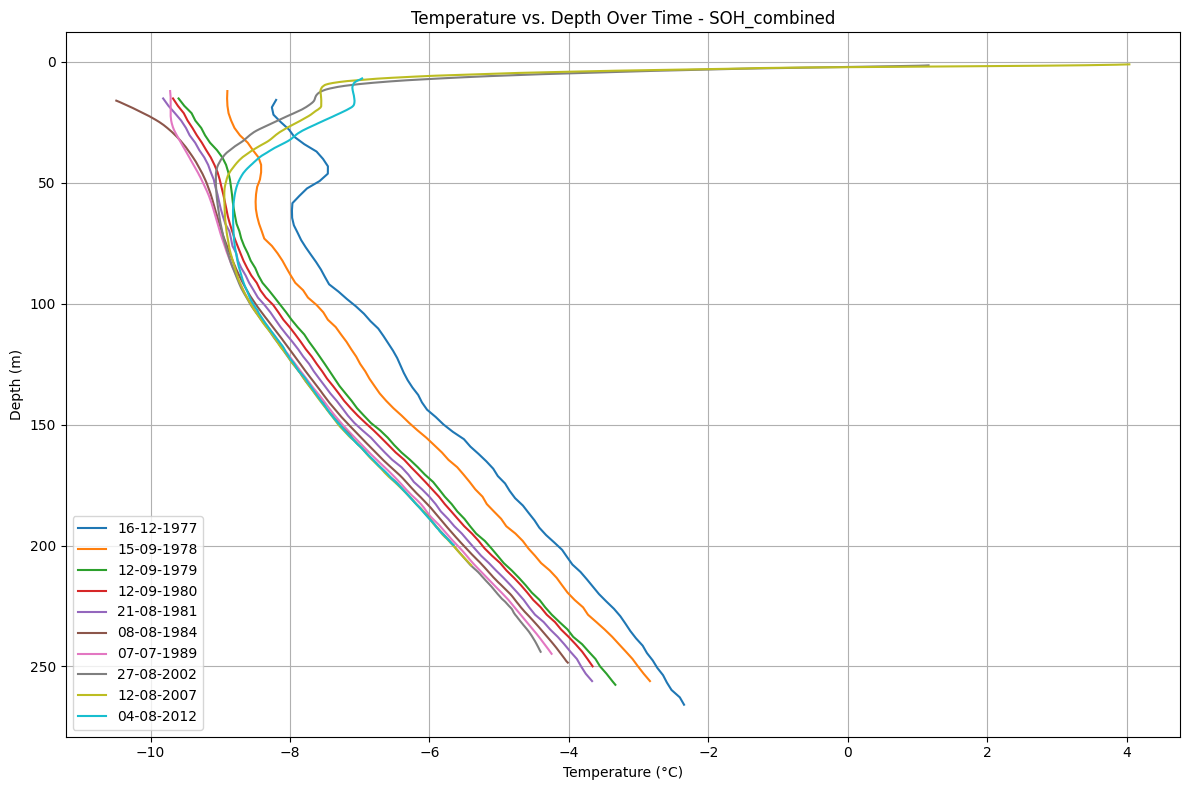

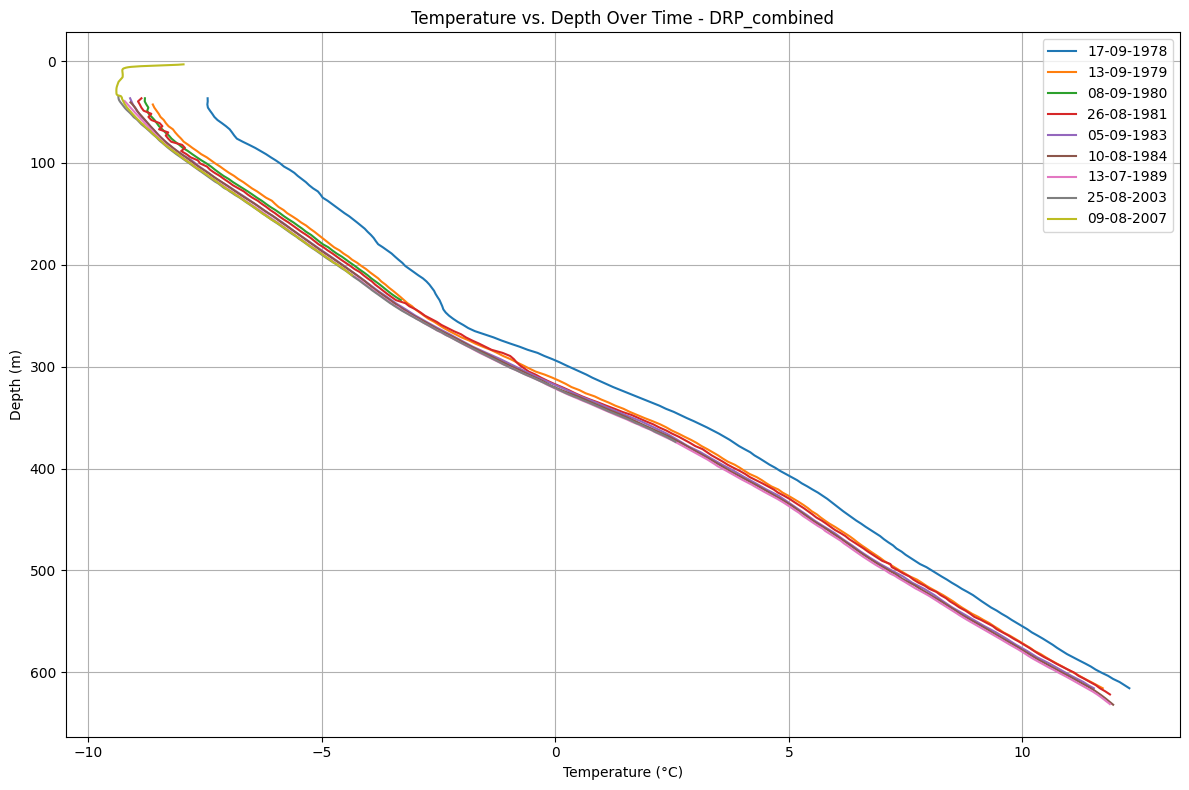

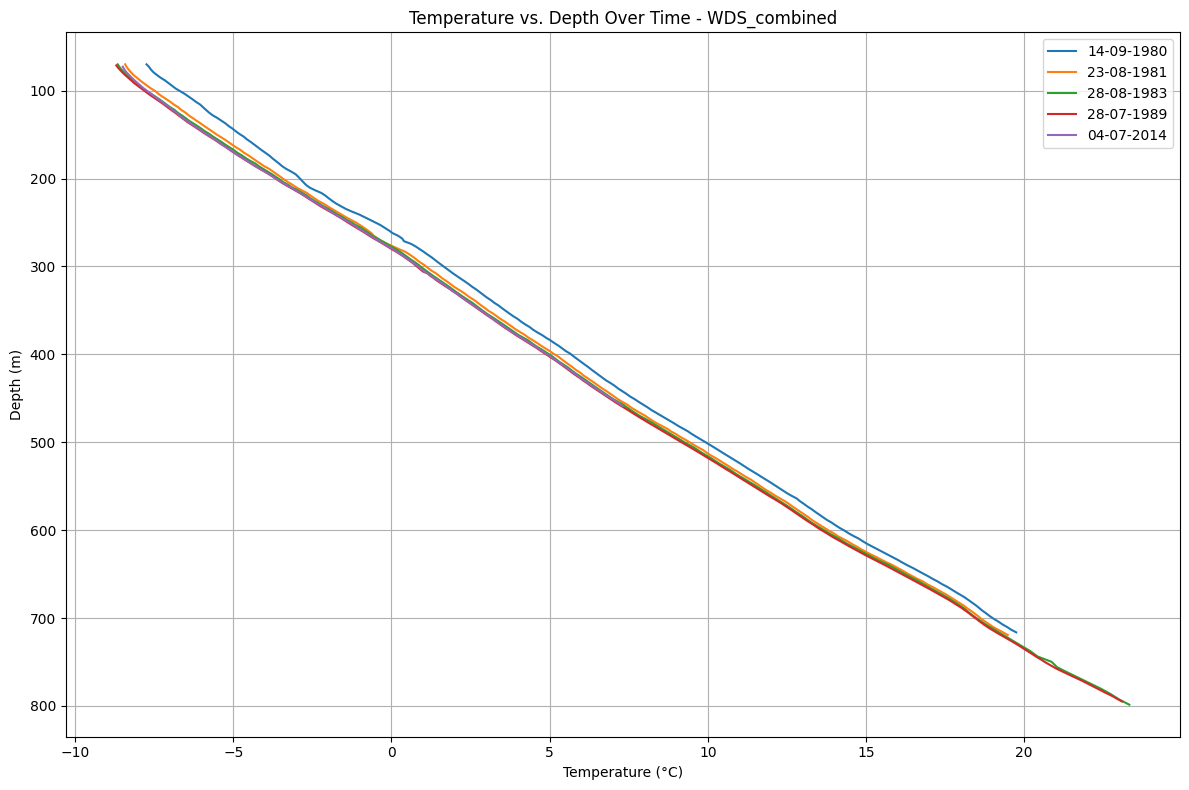

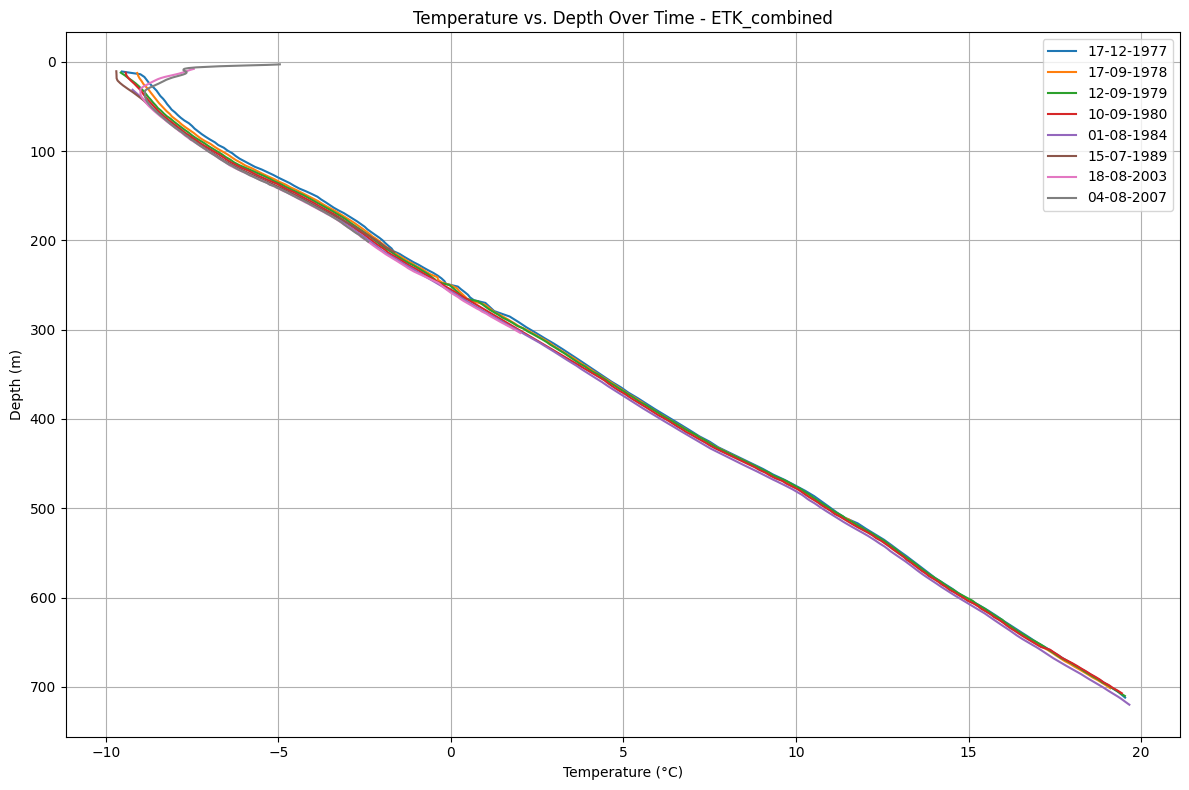

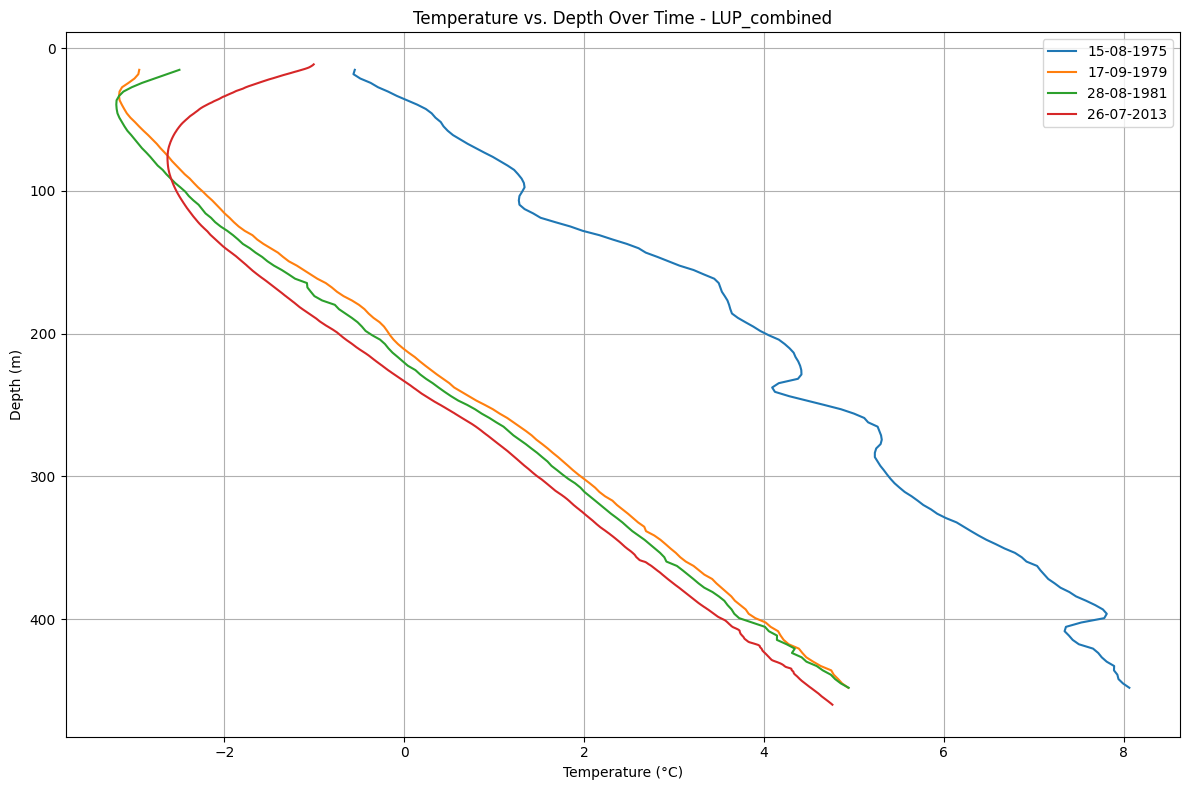

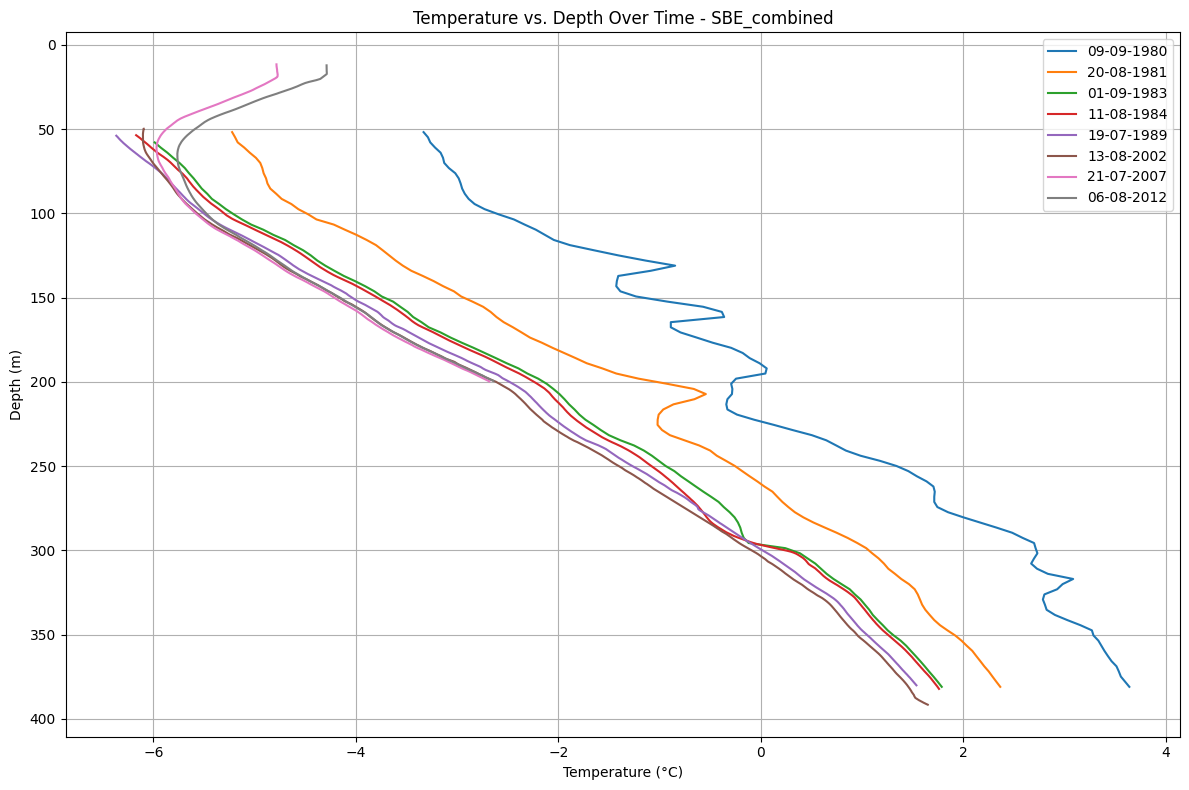

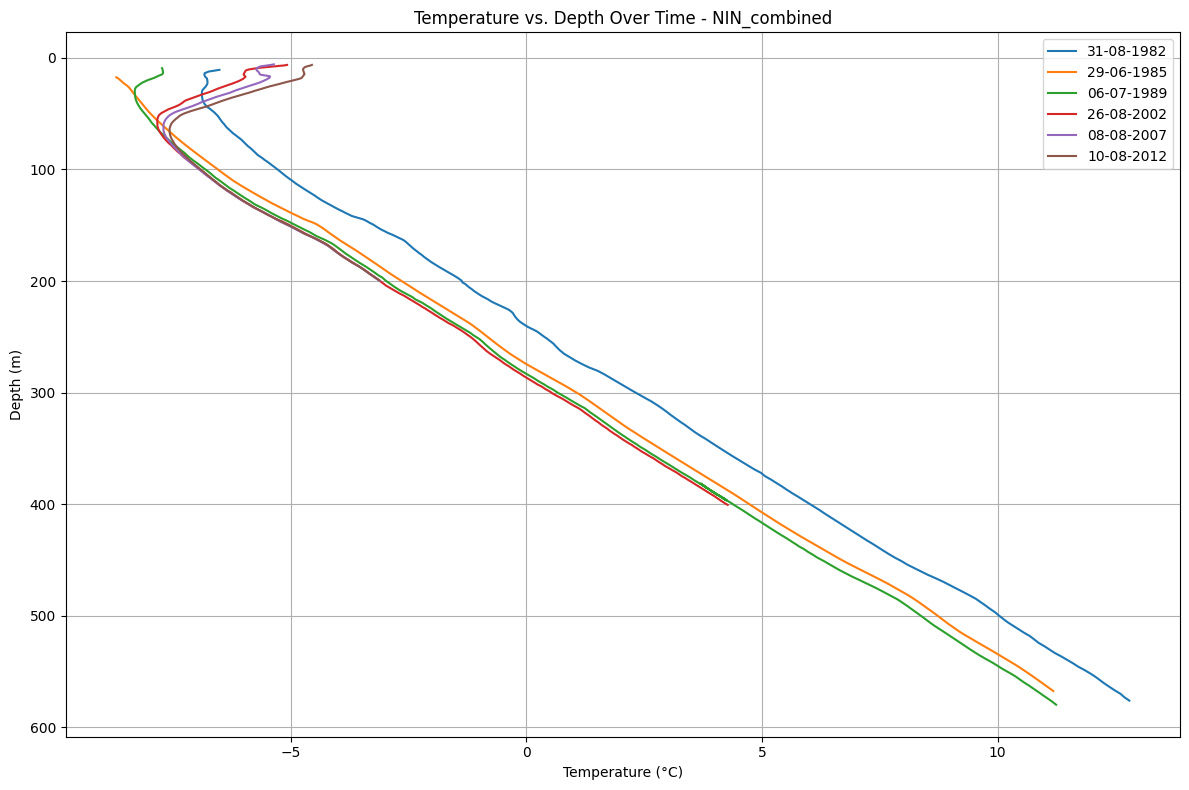

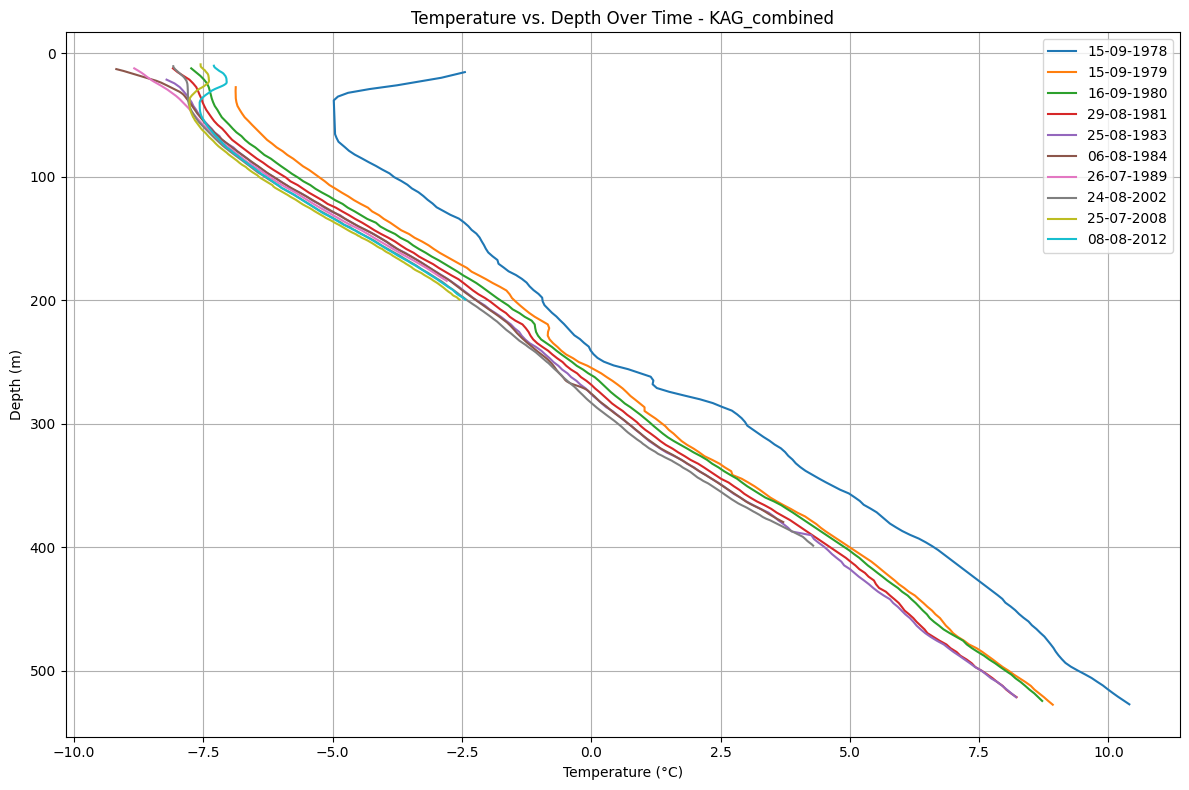

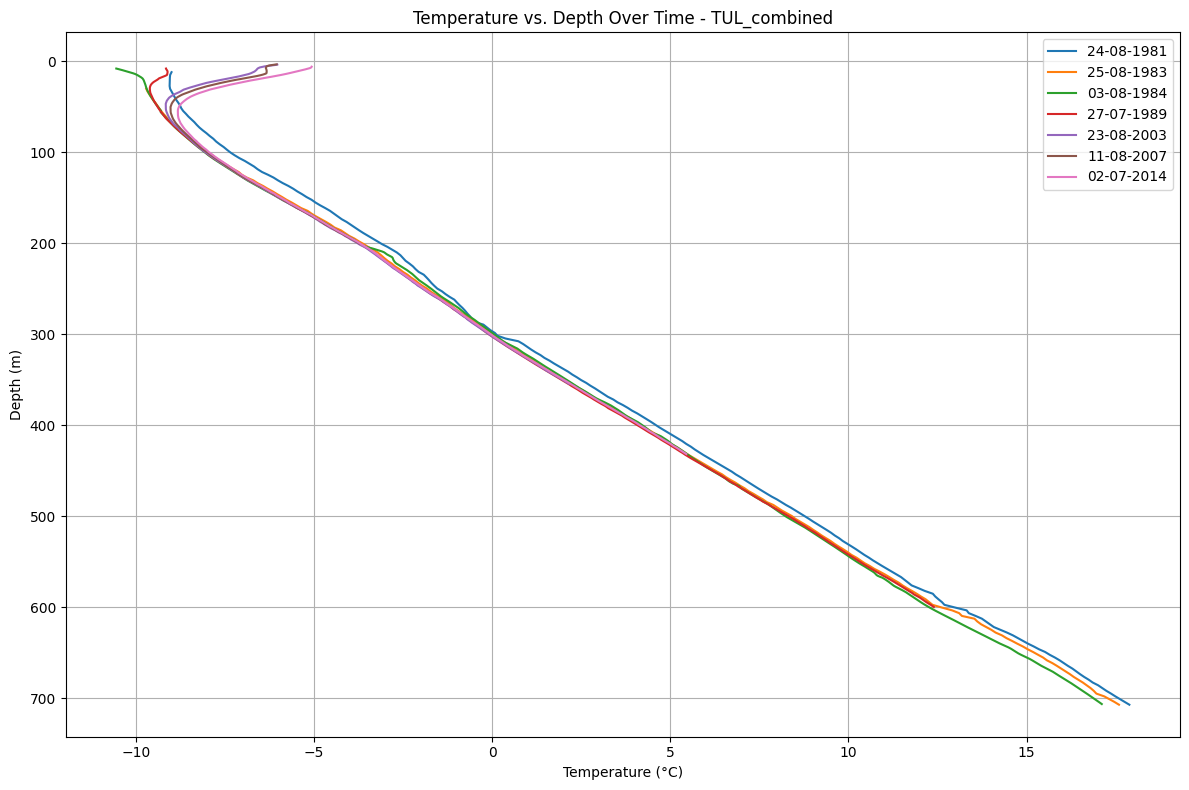

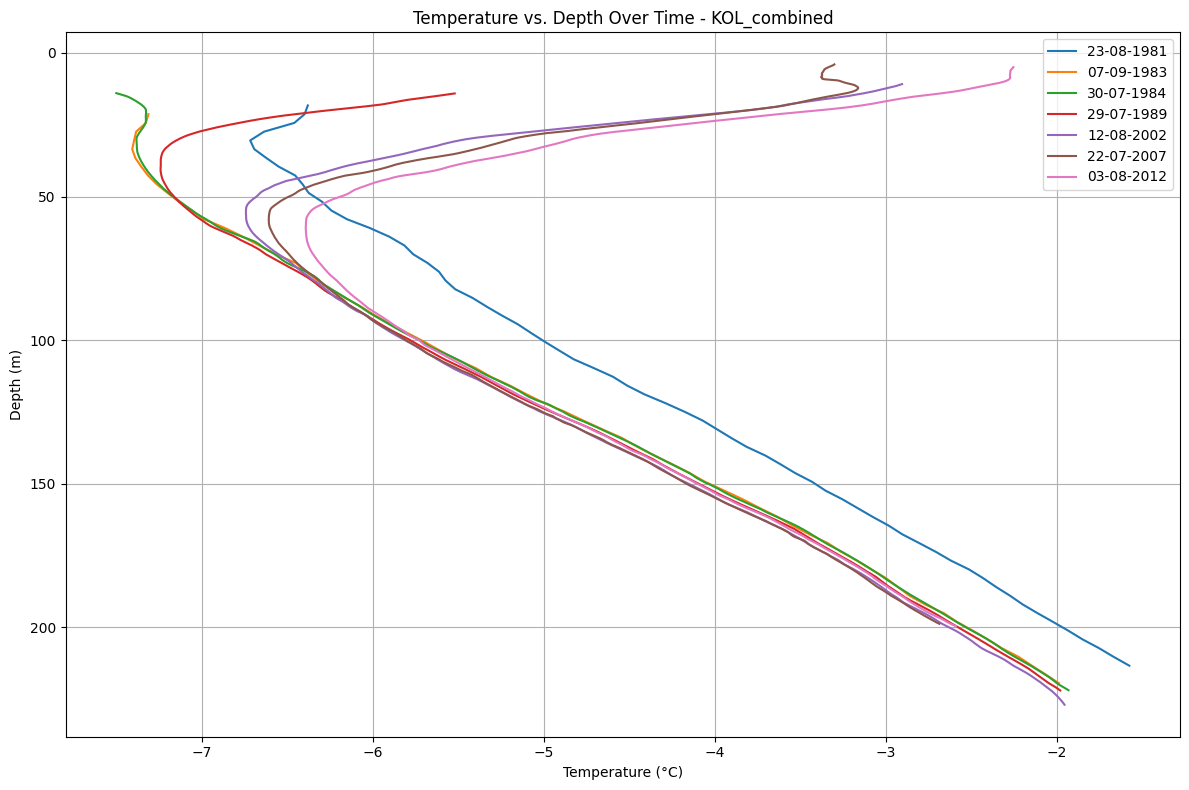

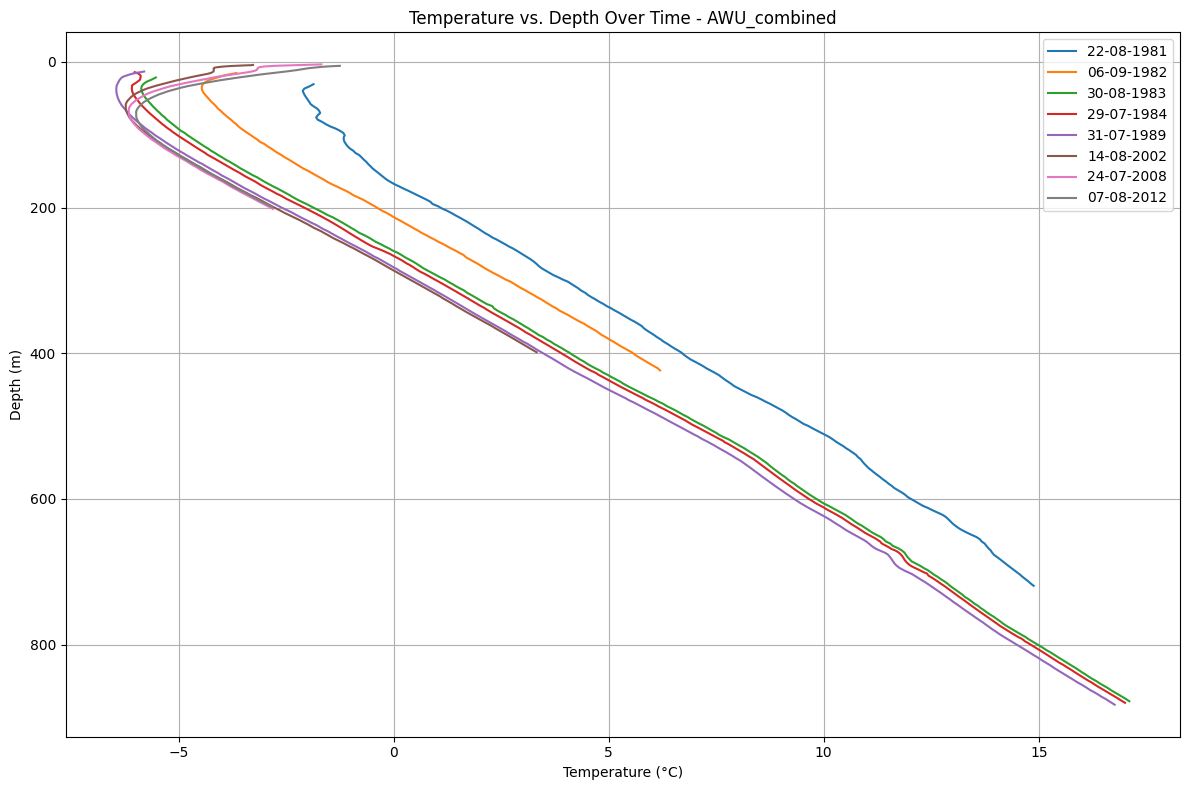

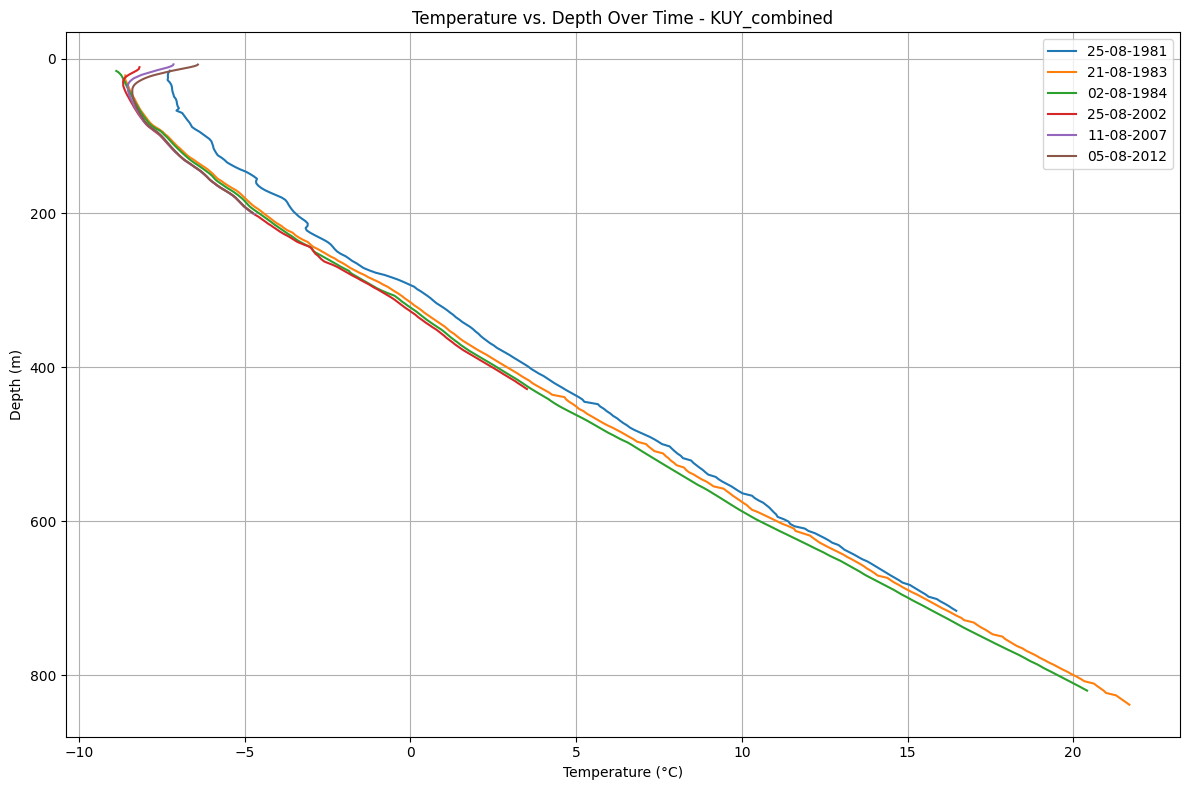

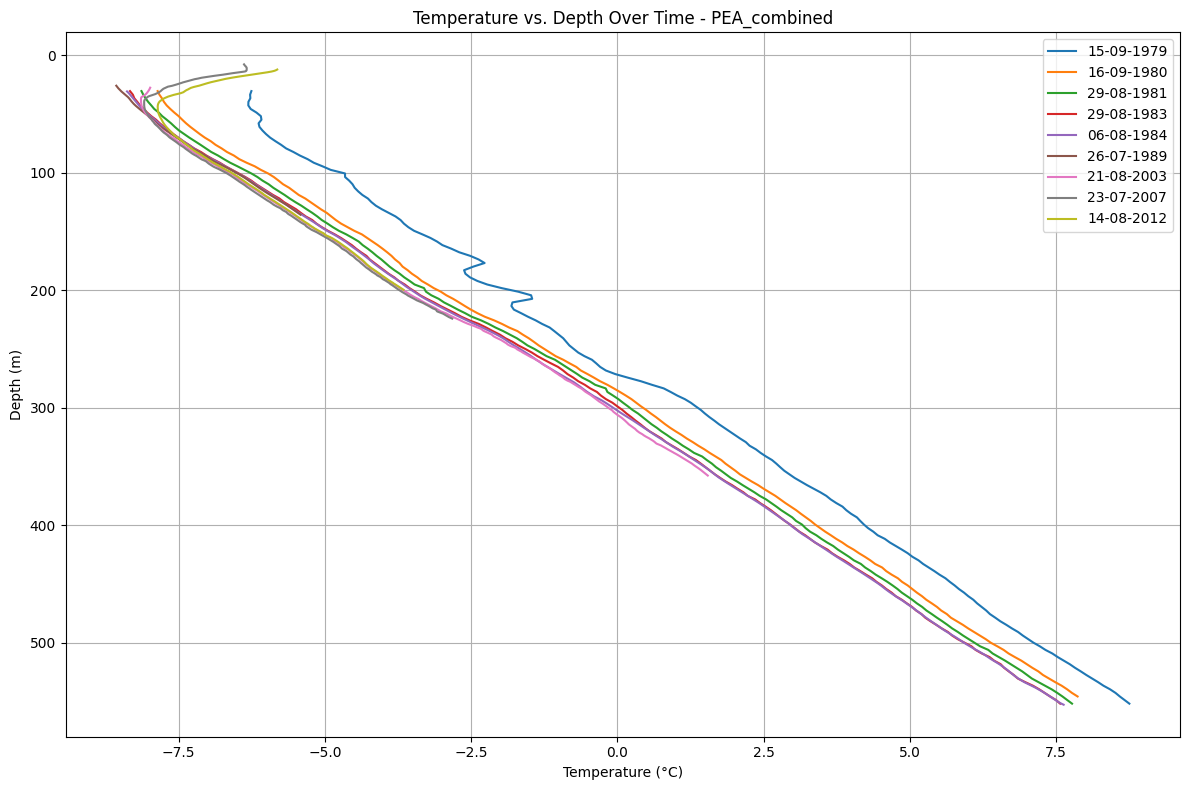

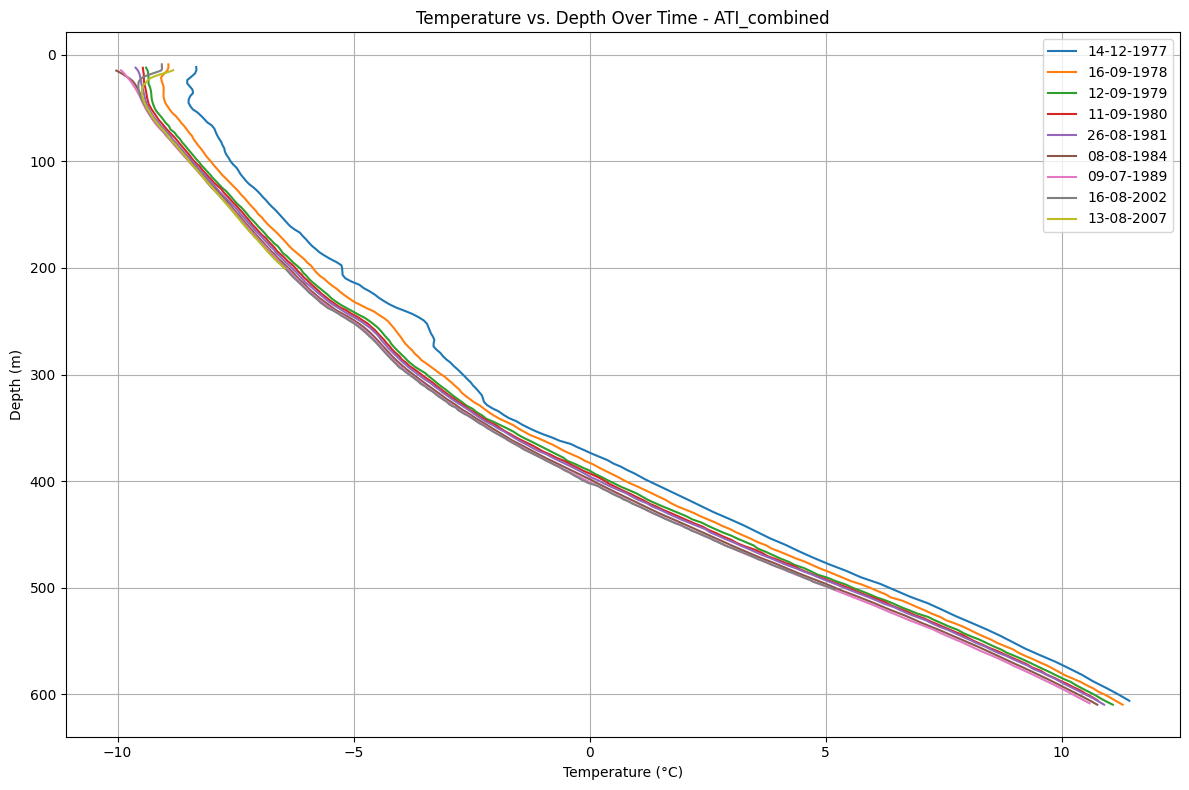

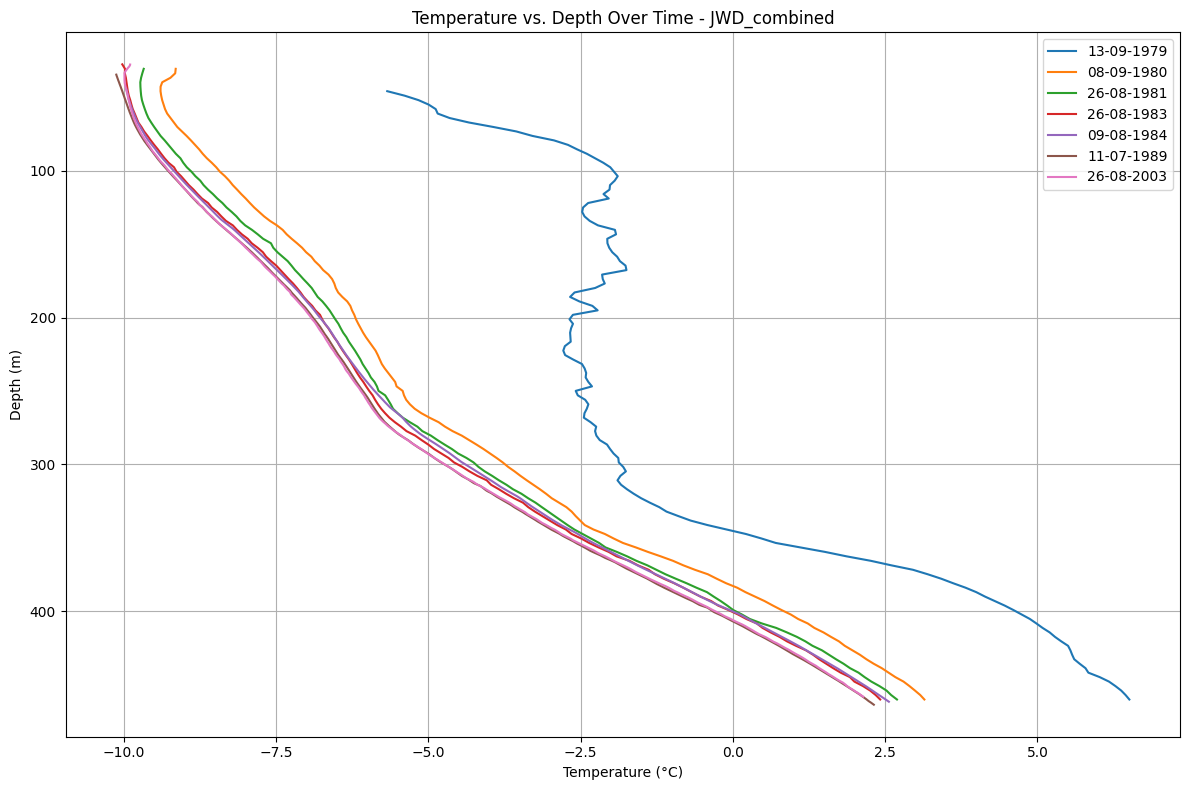

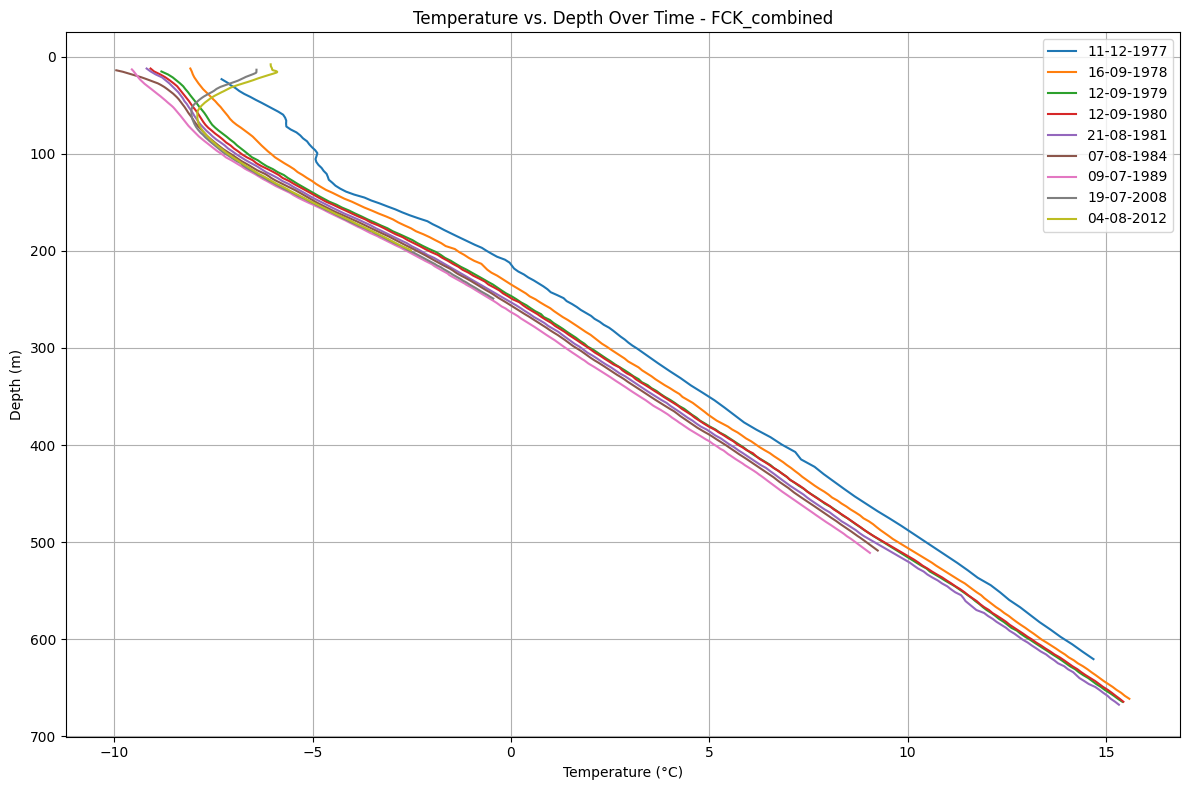

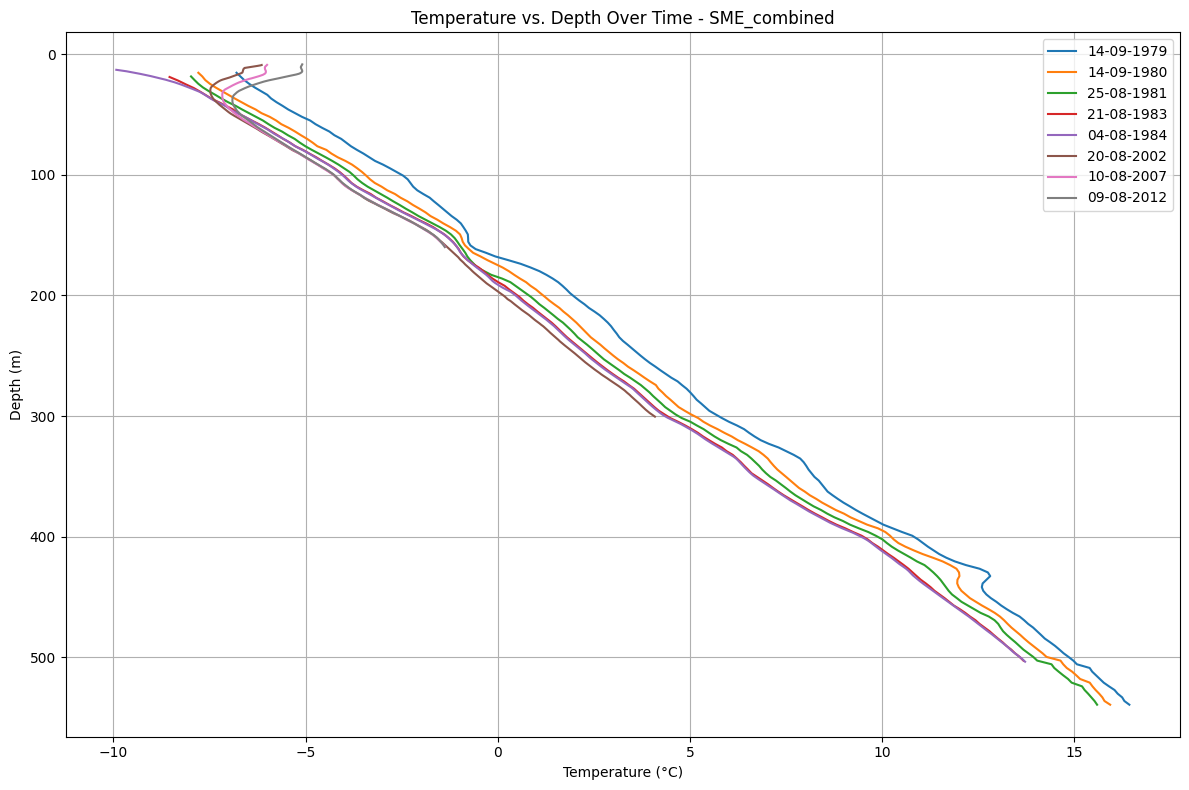

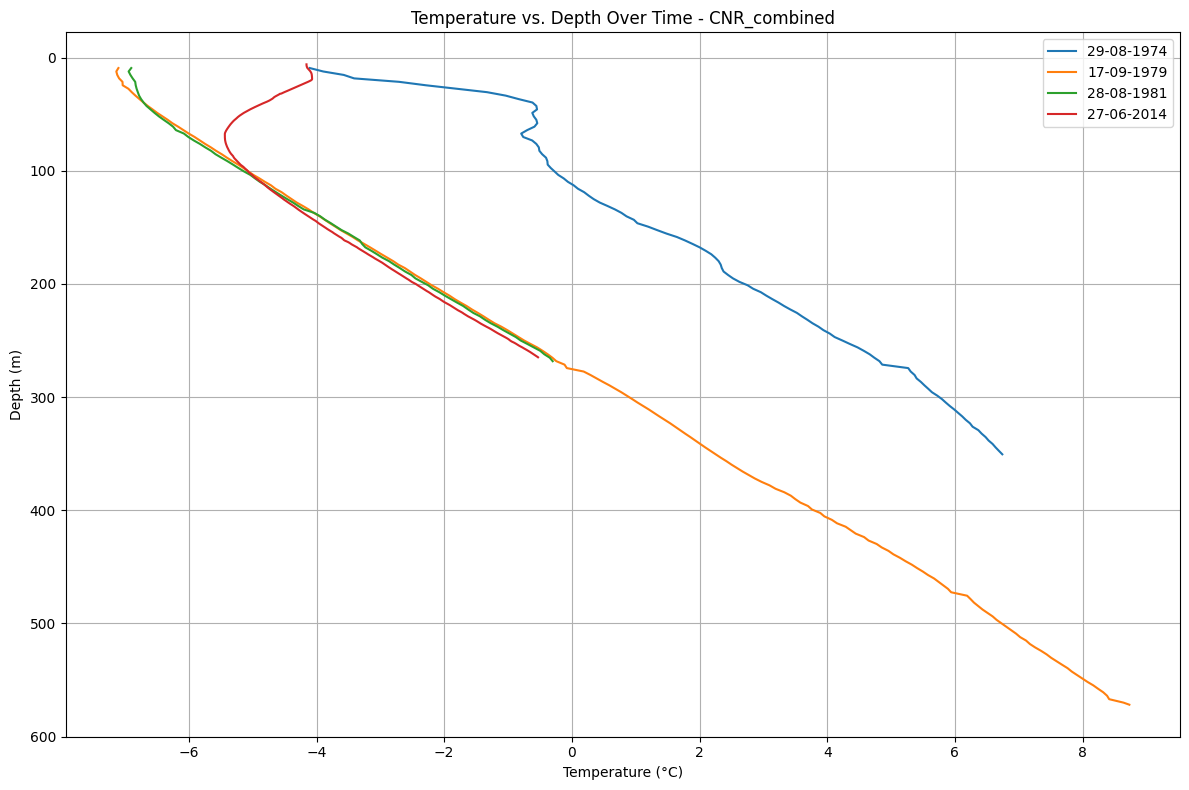

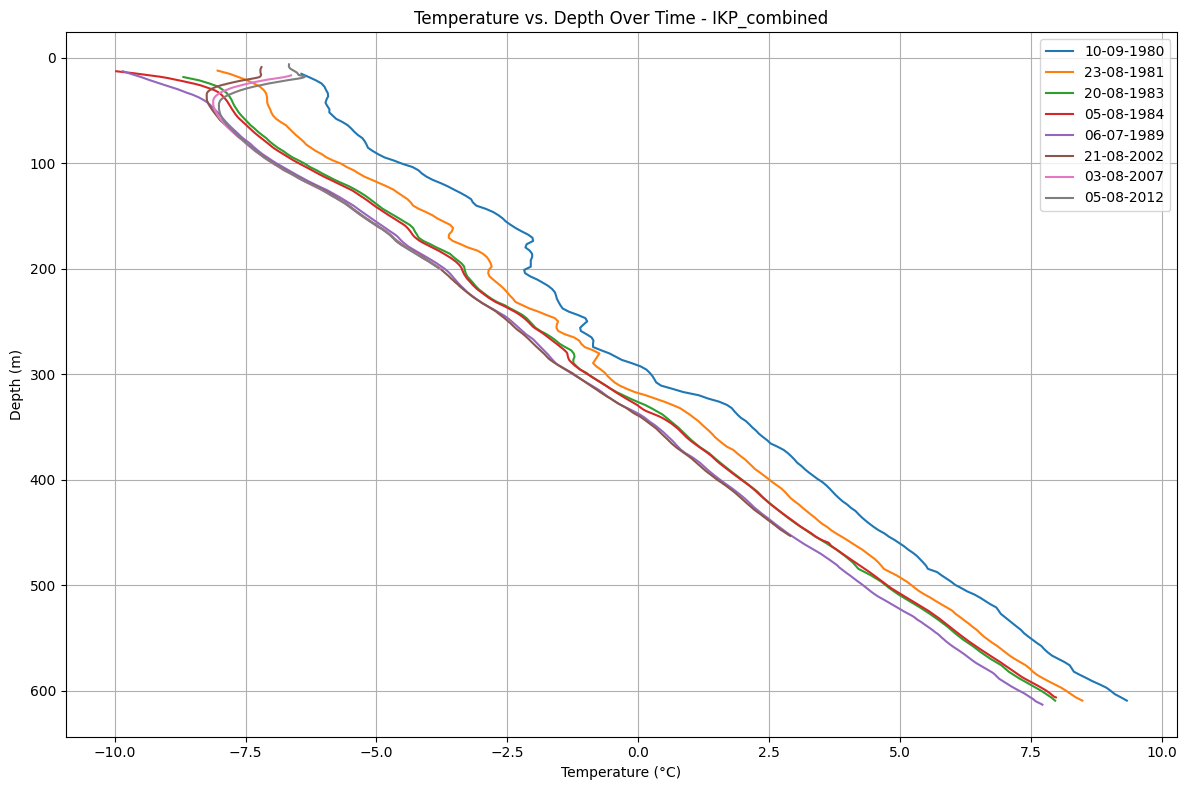

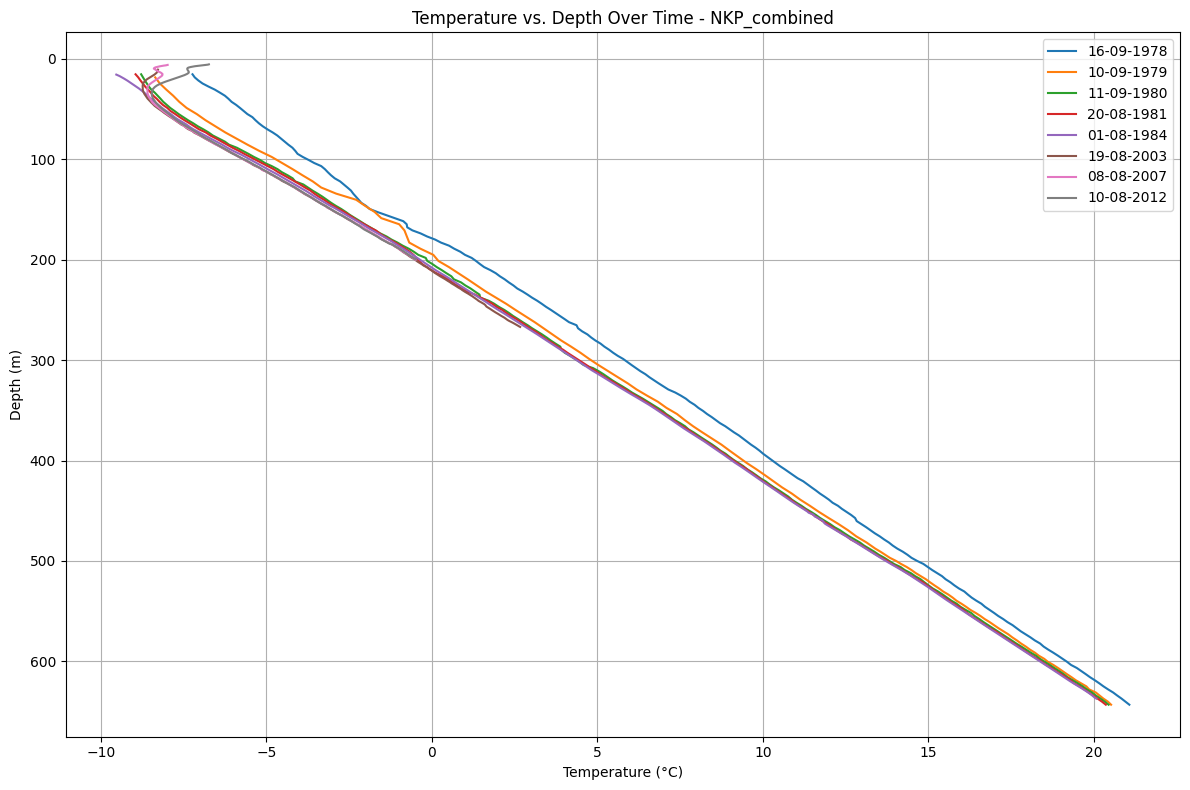

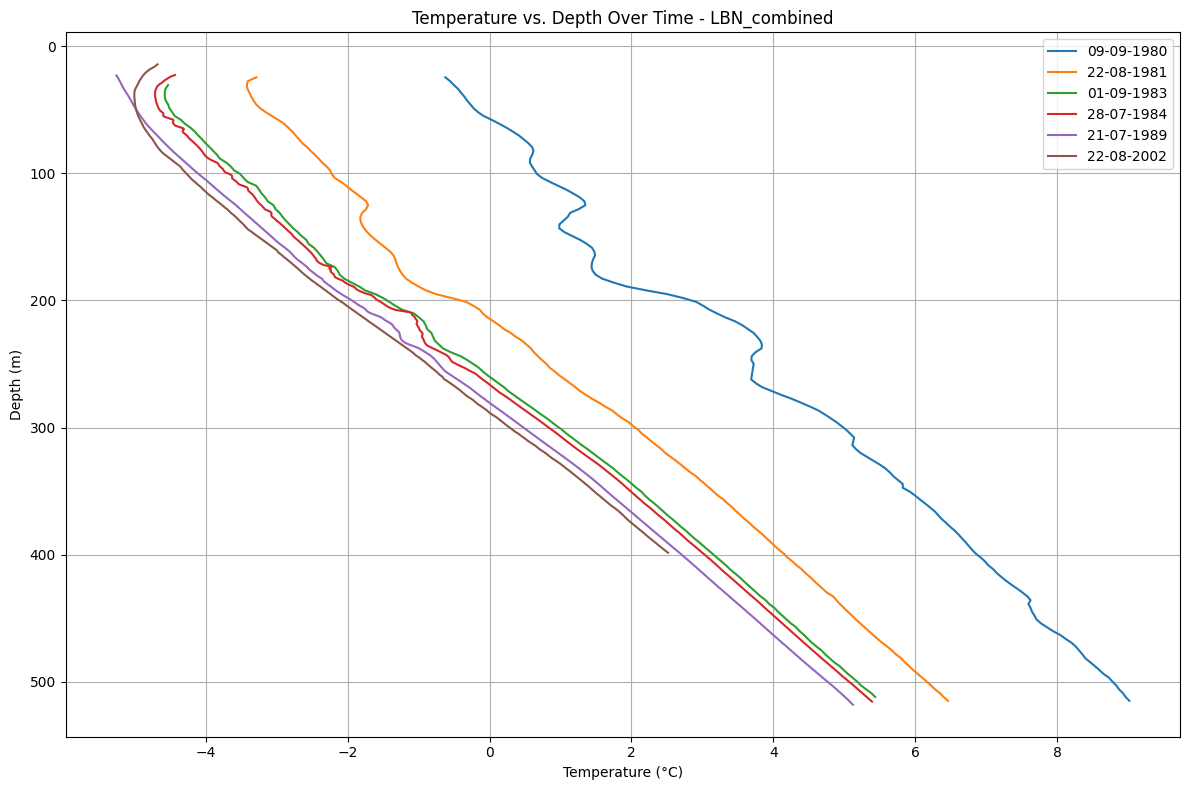

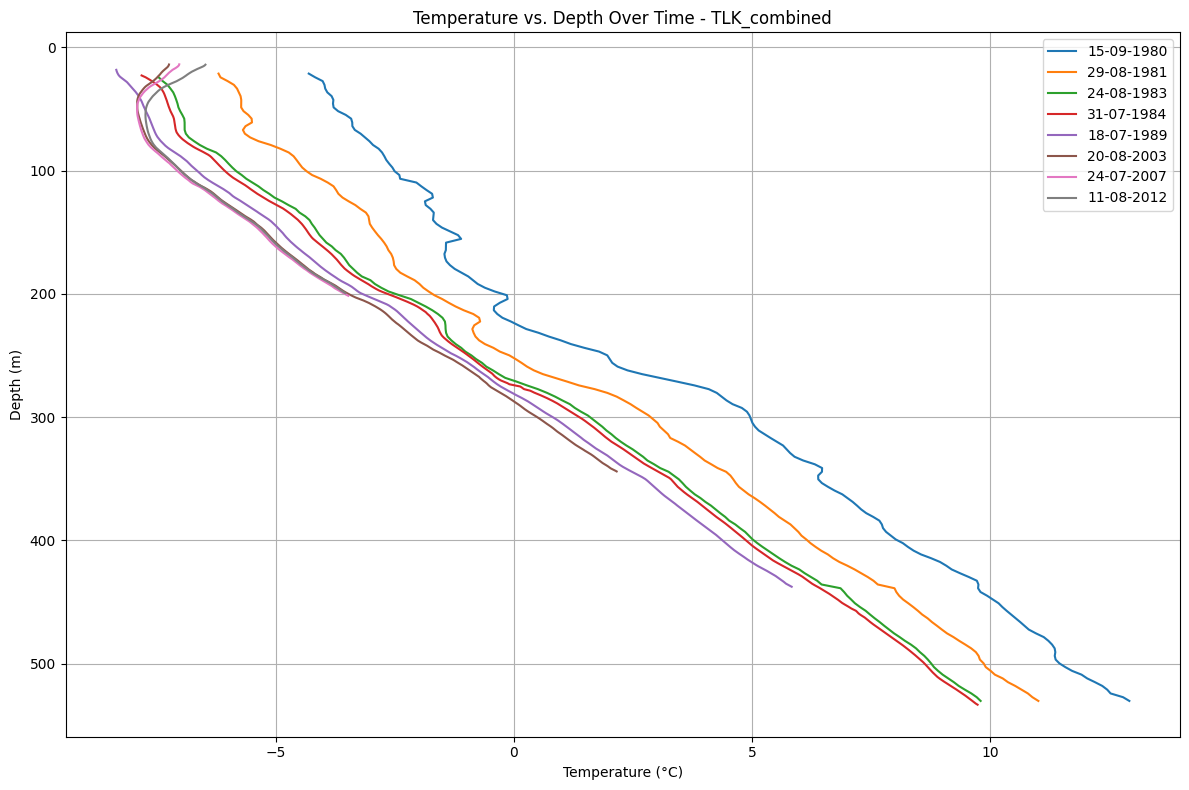

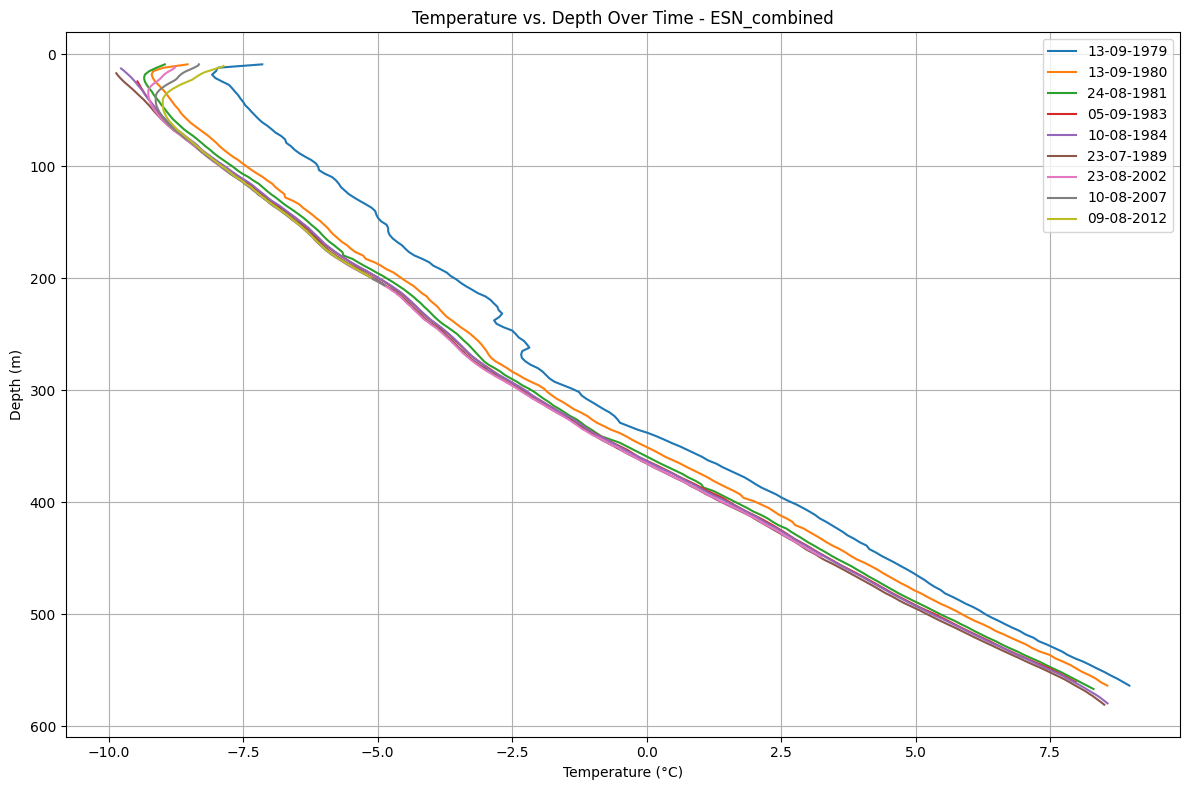

In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder path where your combined files are located
folder_path = '/Users/anastringer_1/permafrost project/combined_files'

# List all the CSV files in the folder
combined_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Loop through each file and plot Temperature vs. Depth for different time points
for file_name in combined_files:
    # Load the combined data file
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    
    # Ensure the 'Date' column is treated as datetime, handle parsing errors
    try:
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'coerce' sets invalid dates to NaT (Not a Time)
    except Exception as e:
        print(f"Error parsing Date in file {file_name}: {e}")
        continue
    
    # Drop rows with missing or invalid dates
    data = data.dropna(subset=['Date'])
    
    # Sort the data by date and depth
    data = data.sort_values(by=['Date', 'Depth'])

    # Plot Temperature vs. Depth for different time points
    plt.figure(figsize=(12, 8))
    unique_dates = data['Date'].unique()

    # Plot temperature curves for each unique time point
    for date in unique_dates:
        subset = data[data['Date'] == date]
        plt.plot(subset['Temperature'], subset['Depth'], label=f'{date.strftime("%d-%m-%Y")}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to show depth increasing downwards
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Depth (m)')
    plt.title(f'Temperature vs. Depth Over Time - {file_name[:-4]}')
    plt.legend()
    plt.grid(True)

    # Save the plot (optional)
    output_file = os.path.join(folder_path, f'{file_name[:-4]}_temp_vs_depth.png')
    plt.savefig(output_file)

    # Show the plot
    plt.tight_layout()
    plt.show()

#### Initial Observation (JWD Plot) 
	•	The temperatures are plotted for multiple years (1979, 1980, 1981, 1983, 1984, 1989, and 2003).
	•	The curves show a general increase in temperature with depth, which is expected in geothermal profiles.
	•	The shallow depths (~0 to 100 meters) show significant fluctuations over time, with the blue curve (1979) and green curve (1981) showing a colder shallow layer compared to the later years (2003).
	•	The uppermost layers (around 50-150 meters) vary more between the years, indicating potential seasonal effects or surface warming.
	•	Deeper layers (beyond 200 meters) show more consistent temperature values across the years, reflecting a more stable geothermal gradient in the deeper subsurface.
	•	What it Indicates:
	•	Seasonal Variation: The shallow depths show more variation over time, which could be influenced by seasonal temperature changes or active layer dynamics (i.e., freezing and thawing of the top layer of permafrost).
	•	Stable Deeper Gradient: Below 200 meters, the temperature increase is more uniform and stable across the years, suggesting that this part of the ground is less affected by seasonal variations and reflects the natural geothermal gradient from the Earth’s heat flux.

#### Initial Observation (KOL Plot) 
	•	The temperatures are plotted for the years 1981, 1983, 1984, 1989, 2002, 2007, and 2012.
	•	In this case, the shallow depths (0 to 50 meters) show larger variations, especially between 1981, 1983, and 1989. The temperature in the shallow layers in 1981 (blue) is much lower than the later years.
	•	There is a noticeable shift in the 2007 and 2012 data, where temperatures are higher at shallow depths compared to previous decades.
	•	Deeper depths (beyond 150 meters) show more consistent behavior across the years, indicating less surface influence and more of the natural geothermal trend.
	•	What it Indicates:
	•	Surface Warming Over Time: The uppermost layers show that in more recent years (2007, 2012), the temperatures are consistently warmer compared to the early 1980s. This could indicate warming at the surface, potentially due to climate change or changes in surface insulation (e.g., changes in snow cover, vegetation).
	•	Stable Geothermal Gradient in Deeper Layers: Below ~150 meters, the temperature increases steadily, and the curves converge across the years, reflecting the natural geothermal heat flow from deeper within the Earth.
